## Import Needed Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Open the data

In [3]:
f = open("C:/Users/Jacob/Desktop/Supplementary Data/Combined Data.csv")

adhd_genotypes = []

for line in f:
    if line.startswith("rsid"):
        continue
    #print(line)
    line = line.strip()
    fields = line.split(",")

    adhd_genotype = fields[3:53]
    adhd_genotypes.append(adhd_genotype)

## Put genotypes of each SNP in it's own dataframe

In [23]:
adhd_status = ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

dfs = {}
counter = 1

for genotypes in adhd_genotypes:
    strcounter = str(counter)
    dfs['df'+strcounter] = pd.DataFrame({'ADHD Status' : adhd_status,'Genotype' : genotypes})
    counter += 1
    
dfs

{'df1':    ADHD Status Genotype
 0            F       TT
 1            F       TT
 2            F       TT
 3            F       CT
 4            F       CT
 5            F       CC
 6            F       CT
 7            F       CC
 8            F       TT
 9            F       CT
 10           F       TT
 11           F       CC
 12           F       CC
 13           F       TT
 14           F       TT
 15           F       TT
 16           F       TT
 17           F       TT
 18           F       TT
 19           F       CT
 20           F       TT
 21           F       CT
 22           F       CC
 23           F       CT
 24           F       CT
 25           T       TT
 26           T       TT
 27           T       CC
 28           T       CT
 29           T       CT
 30           T       CT
 31           T       CT
 32           T       TT
 33           T       TT
 34           T       CT
 35           T       TT
 36           T       CT
 37           T       CT
 38           T   

## Make contingency tables for each SNP

In [24]:
contingencies = {}
counter = 1

for df in dfs:
    strcounter = str(counter)
    contingencies['contingency'+strcounter] = pd.crosstab(dfs[df]['ADHD Status'],dfs[df]['Genotype'])
    counter += 1

contingencies

{'contingency1': Genotype     CC  CT  TT
 ADHD Status            
 F             5   8  12
 T             4  12   9,
 'contingency2': Genotype     CT  NA  TT
 ADHD Status            
 F             0  22   3
 T             2  21   2,
 'contingency3': Genotype     CT  NA  TT
 ADHD Status            
 F             1   5  19
 T             0   7  18,
 'contingency4': Genotype     --  AA  AC  CC  NA
 ADHD Status                    
 F             5  10   3   2   5
 T             0  12   6   0   7,
 'contingency5': Genotype     CC  CT  NA
 ADHD Status            
 F             2   1  22
 T             2   2  21,
 'contingency6': Genotype     CC  CT  TT
 ADHD Status            
 F             1   4  20
 T             0   4  21,
 'contingency7': Genotype     AA  AG  GG
 ADHD Status            
 F            10  12   3
 T             9  12   4,
 'contingency8': Genotype     GG  GT
 ADHD Status        
 F            23   2
 T            25   0,
 'contingency9': Genotype     AA  AG  NA
 ADHD S

## Conduct Chi-Squared Analysis for each SNP

In [59]:
chi_squared_analyses = {}
counter = 1

for contingency in contingencies:
    strcounter = str(counter)
    chi_squared_analyses[strcounter] = chi2_contingency(contingencies[contingency])
    counter += 1
    
chi2_analyses = pd.DataFrame(chi_squared_analyses)
chi2_analyses_table = chi2_analyses.T.reset_index()
chi2_analyses_table.columns = ['Chi Squared Analysis','Chi Squared Value','P-value','dof','Array']
chi2_analyses_table

,Chi Squared Analysis,Chi Squared Value,P-value,dof,Array
0,1,1.339683,0.51179,2,"[[4.5, 10.0, 10.5], [4.5, 10.0, 10.5]]"
1,2,2.223256,0.329023,2,"[[1.0, 21.5, 2.5], [1.0, 21.5, 2.5]]"
2,3,1.36036,0.506526,2,"[[0.5, 6.0, 18.5], [0.5, 6.0, 18.5]]"
3,4,8.515152,0.074429,4,"[[2.5, 11.0, 4.5, 1.0, 6.0], [2.5, 11.0, 4.5, ..."
4,5,0.356589,0.836696,2,"[[2.0, 1.5, 21.5], [2.0, 1.5, 21.5]]"
...,...,...,...,...,...
156,157,1.023256,0.599519,2,"[[3.0, 0.5, 21.5], [3.0, 0.5, 21.5]]"
157,158,0.356589,0.836696,2,"[[2.0, 1.5, 21.5], [2.0, 1.5, 21.5]]"
158,159,0.0,1.0,1,"[[3.5, 21.5], [3.5, 21.5]]"
159,160,0.0,1.0,2,"[[3.0, 13.0, 9.0], [3.0, 13.0, 9.0]]"


## Make Heatmap for each SNP

<ipython-input-26-8c9df2f9d17a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


{'Heatmap0': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap1': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap2': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap3': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap4': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap5': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap6': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap7': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap8': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap9': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap10': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap11': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap12': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap13': <AxesSubplot:xlabel='Genotype', ylabel='ADHD Status'>,
 'Heatmap14': <AxesSubplot:xlabel='Genotype'

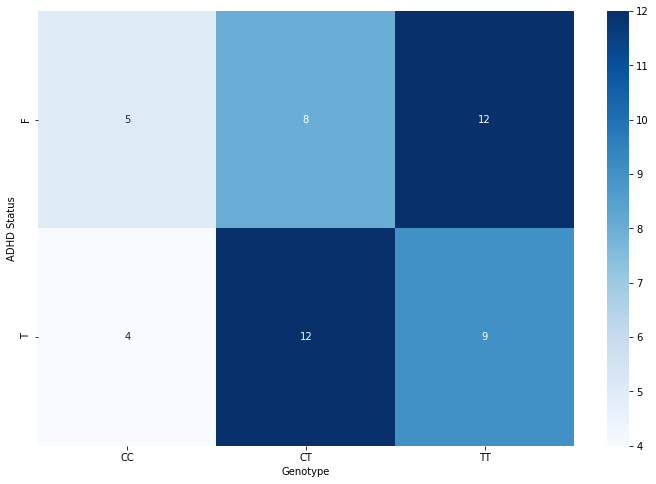

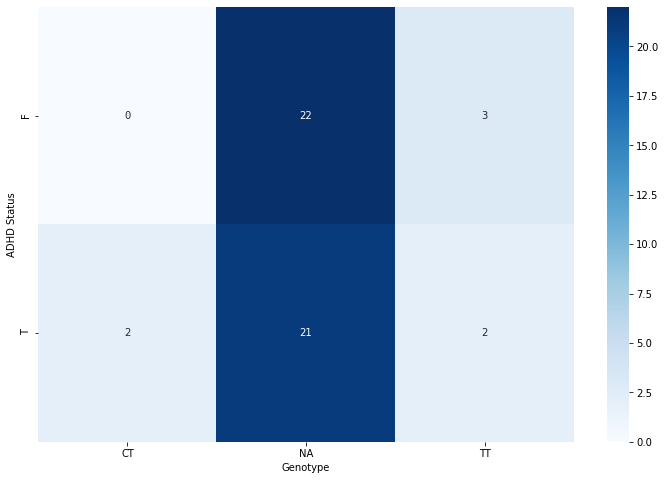

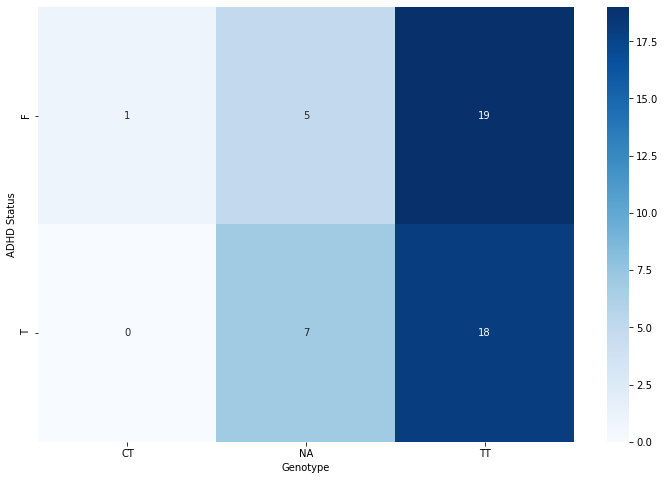

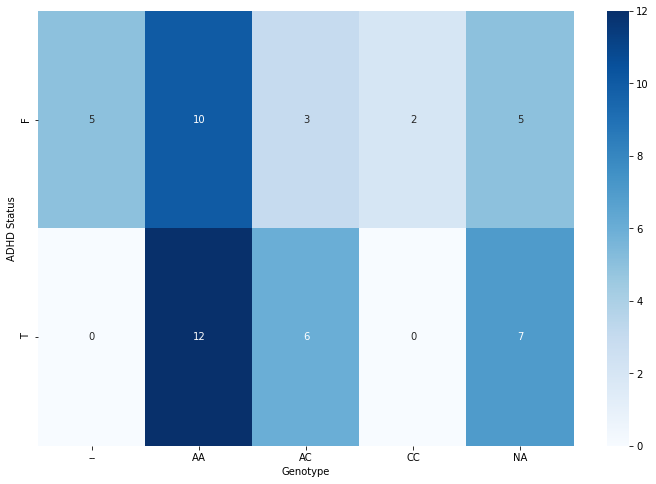

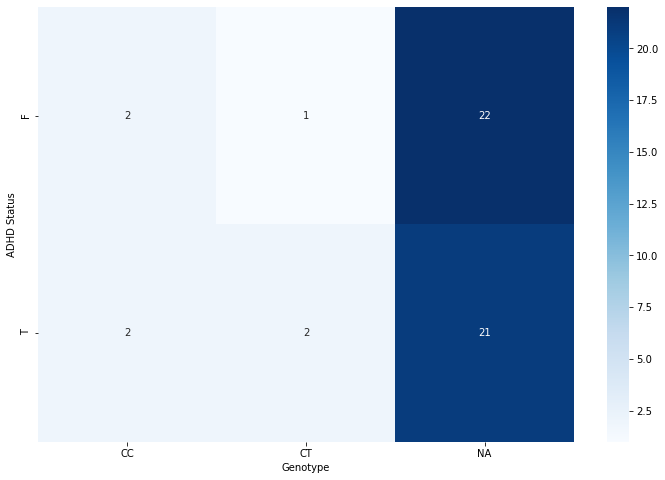

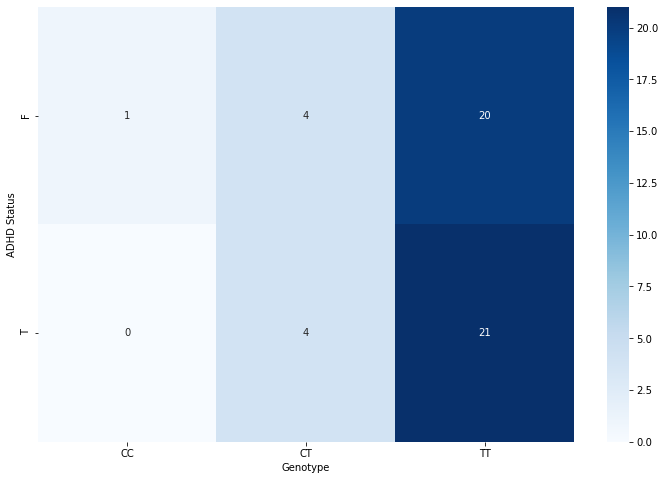

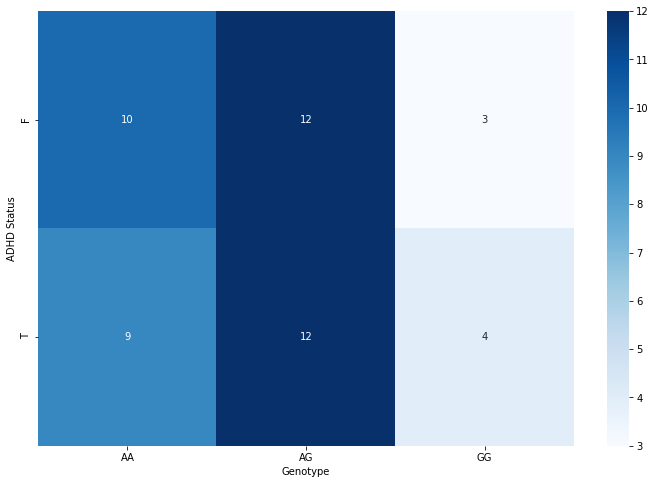

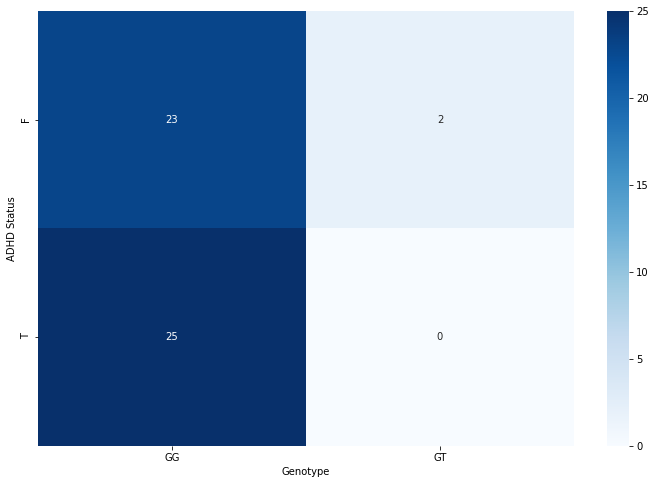

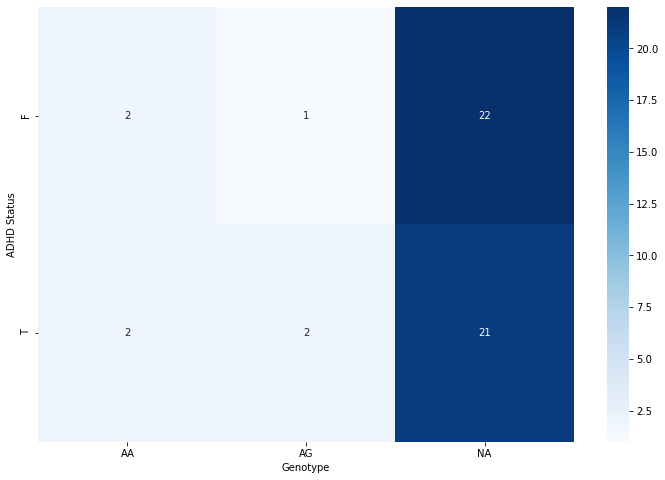

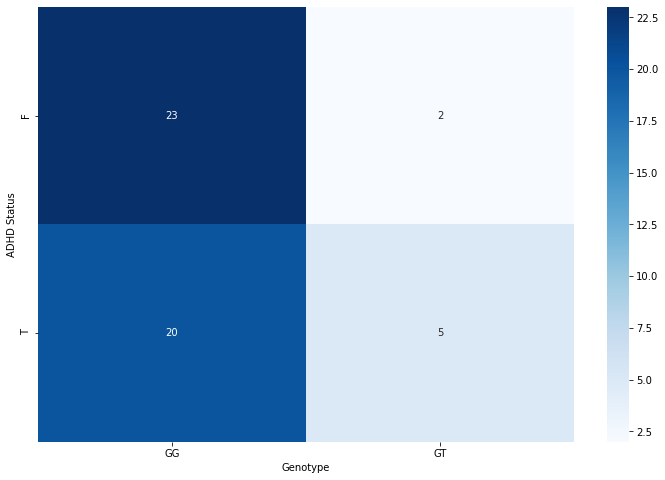

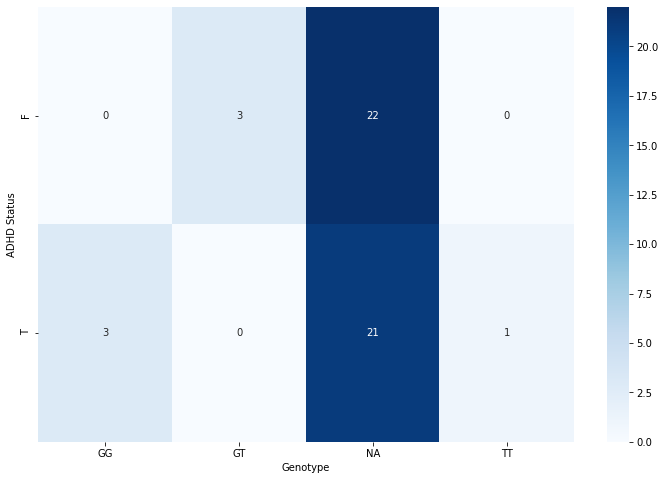

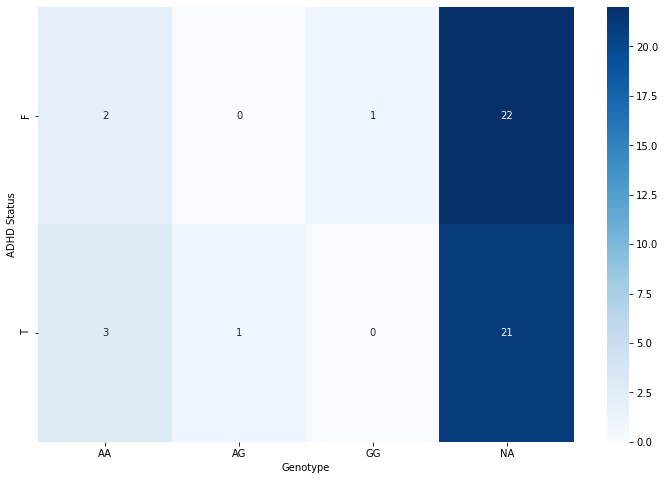

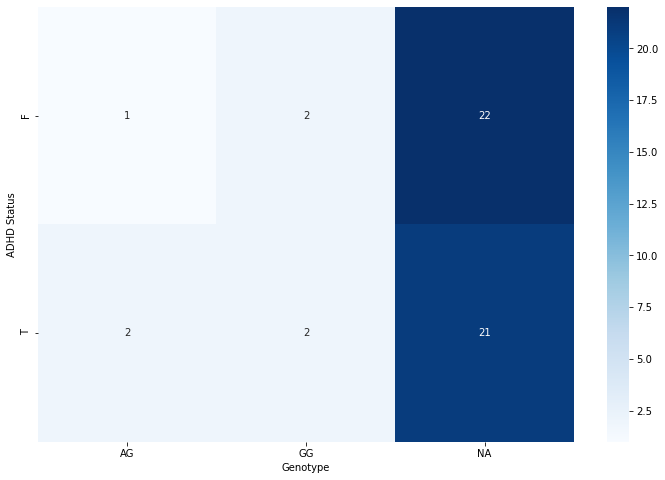

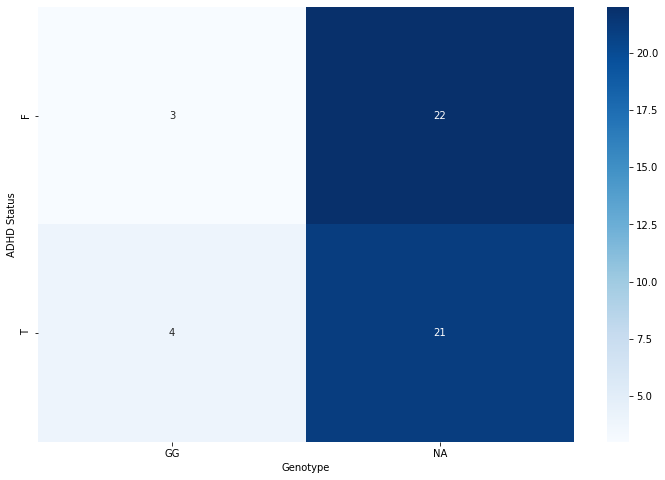

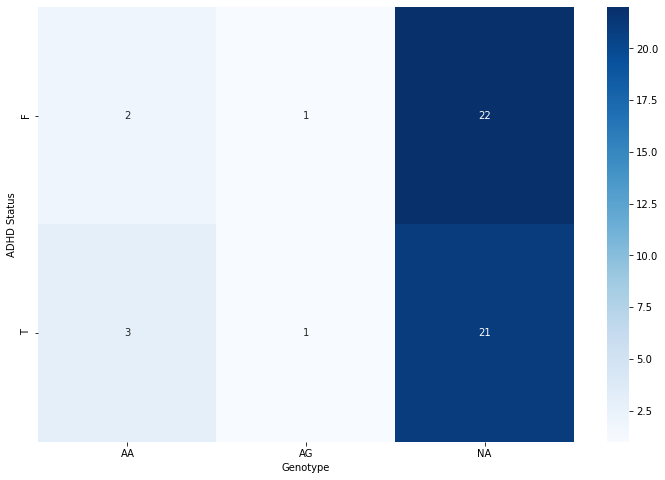

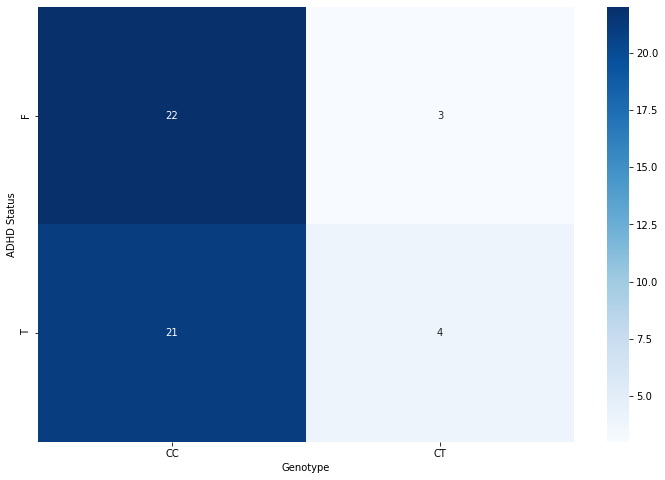

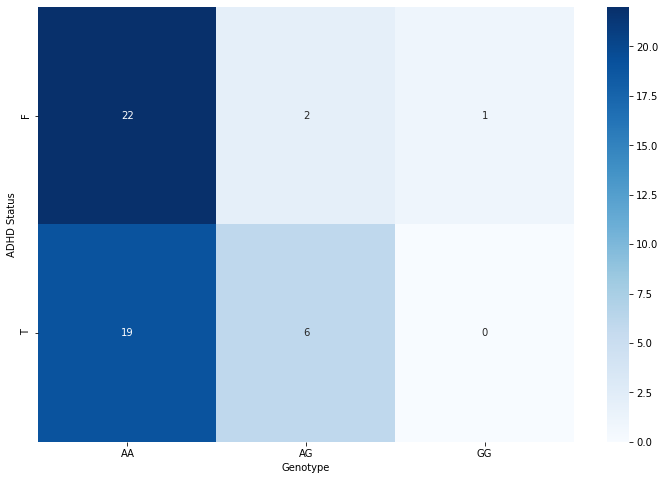

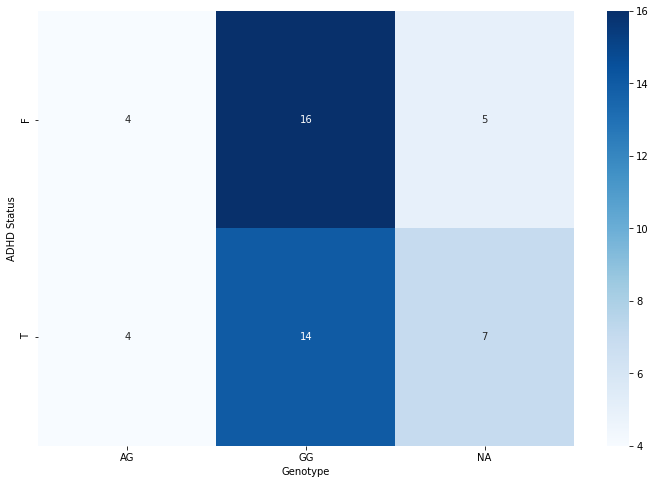

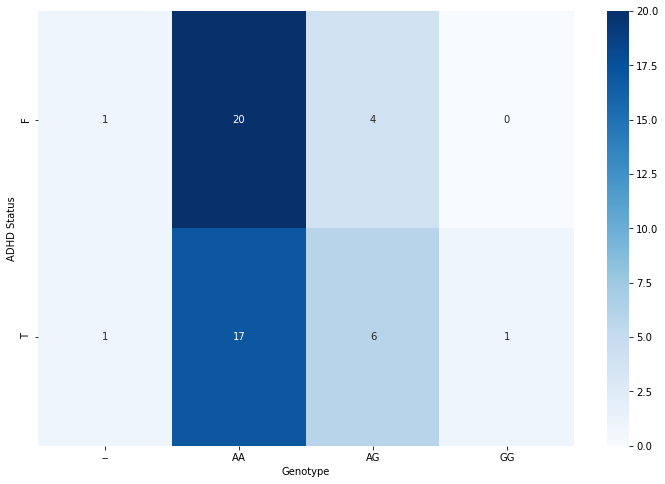

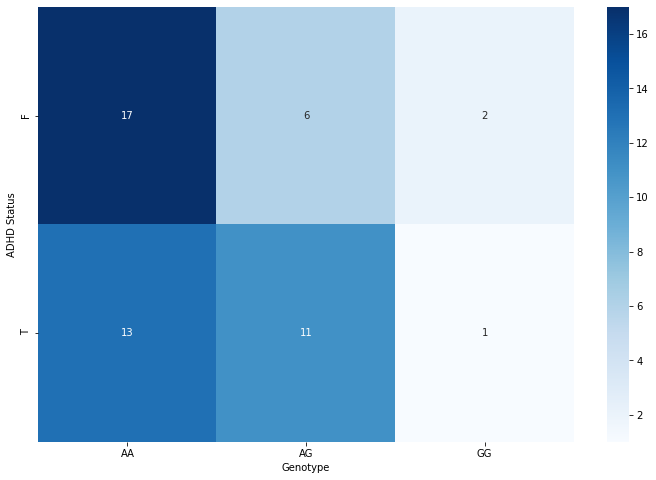

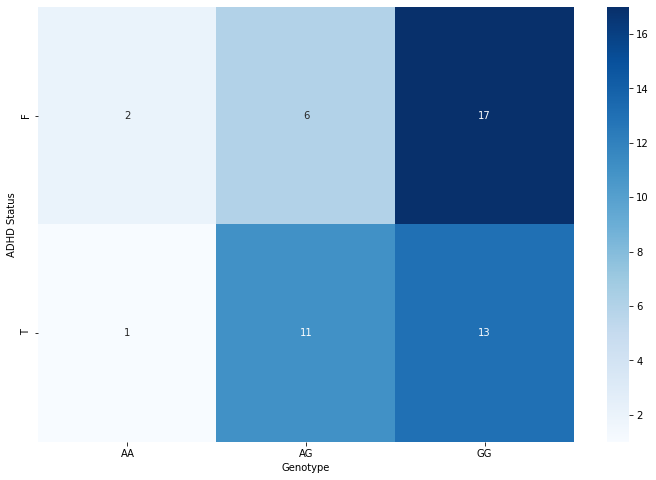

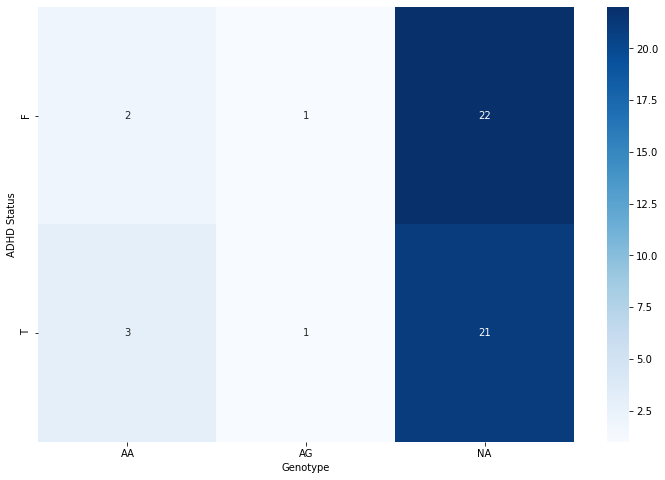

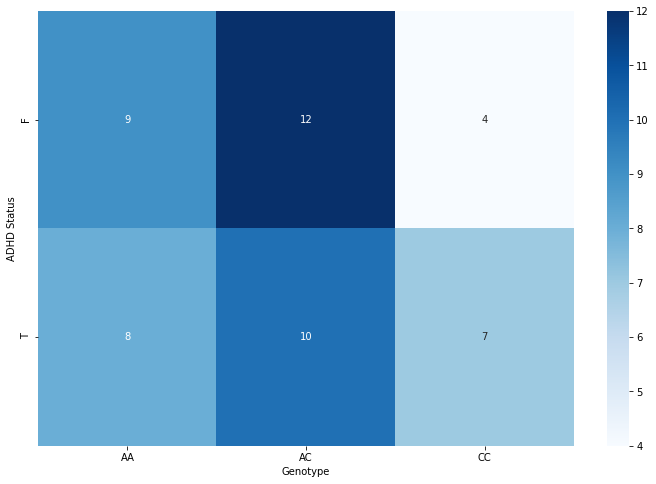

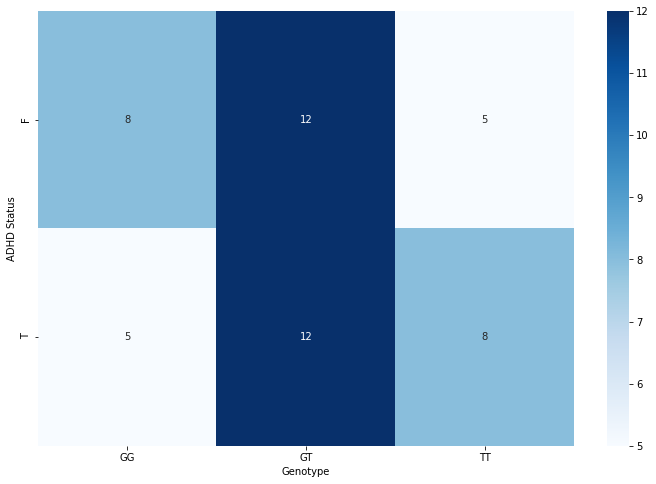

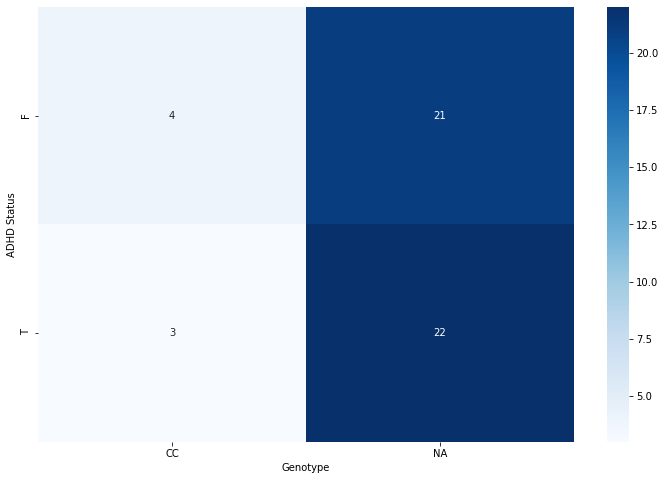

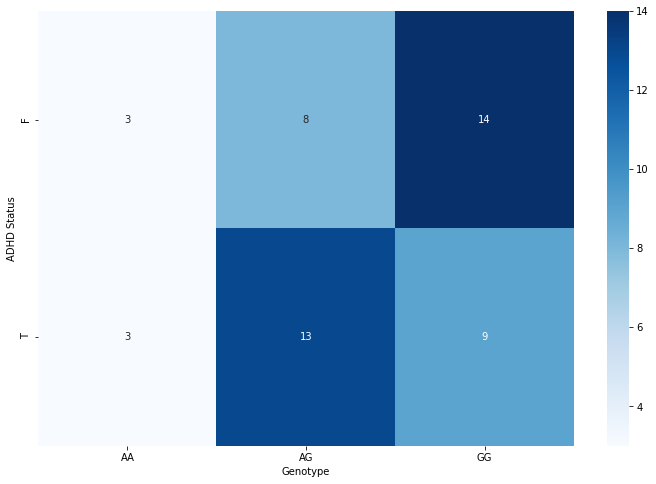

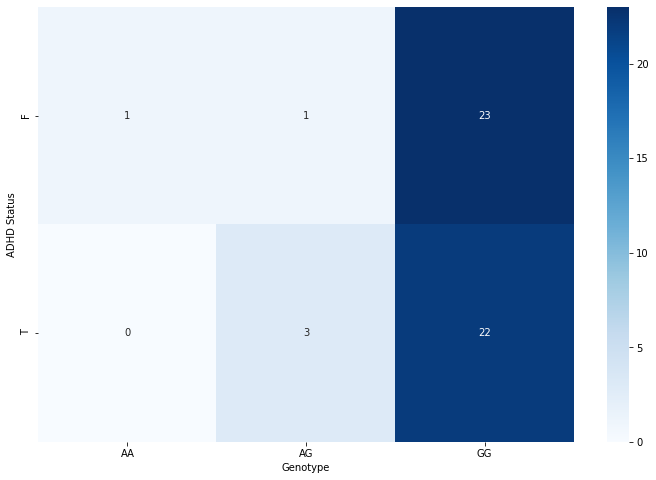

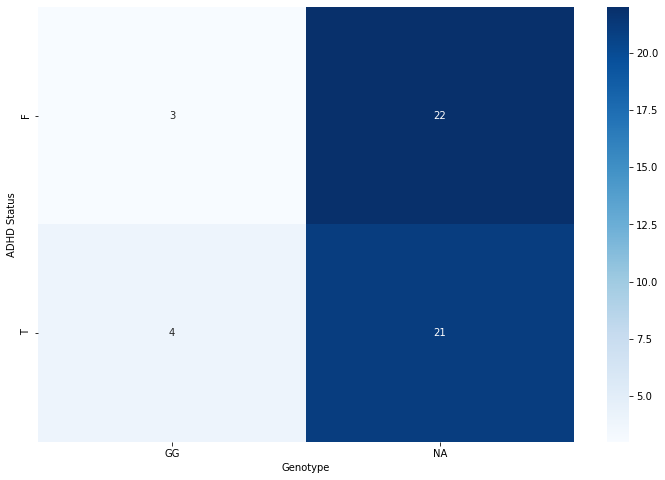

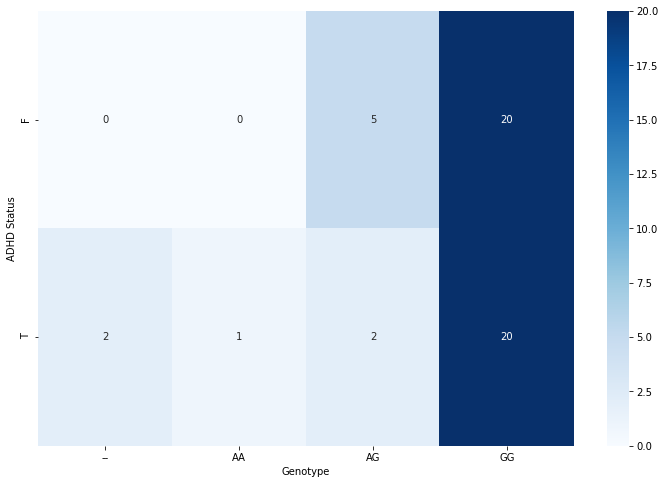

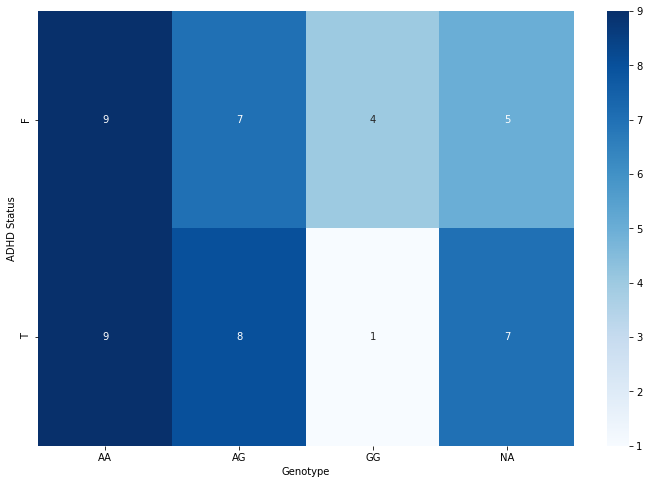

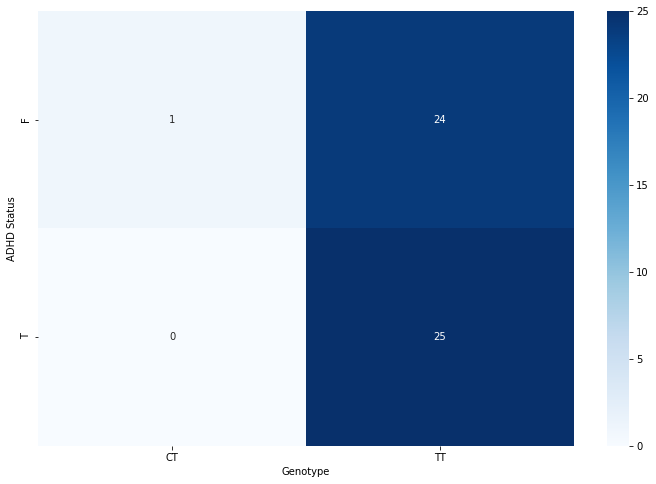

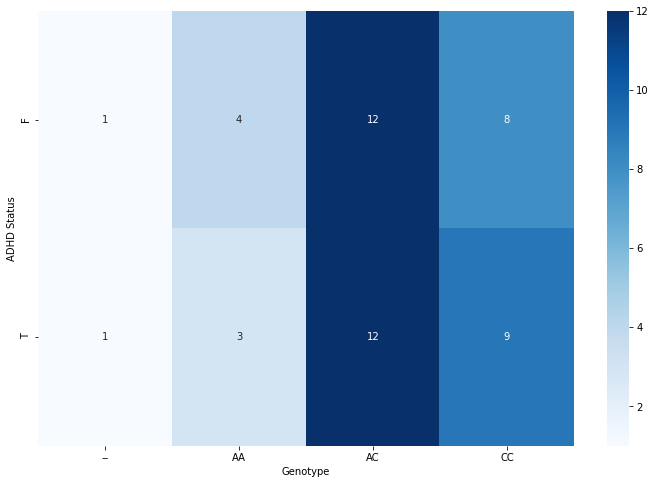

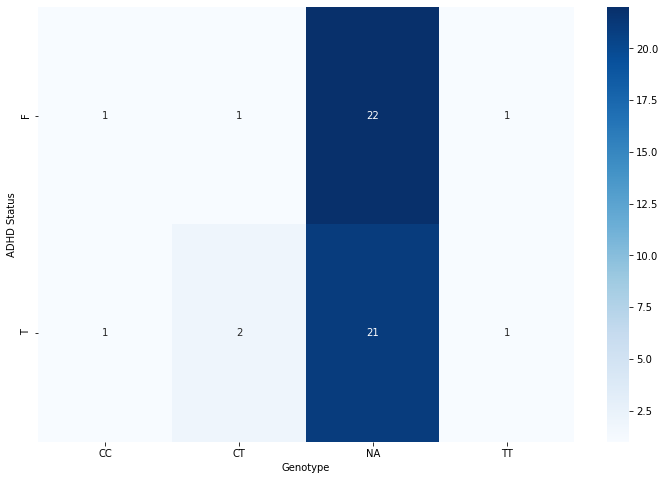

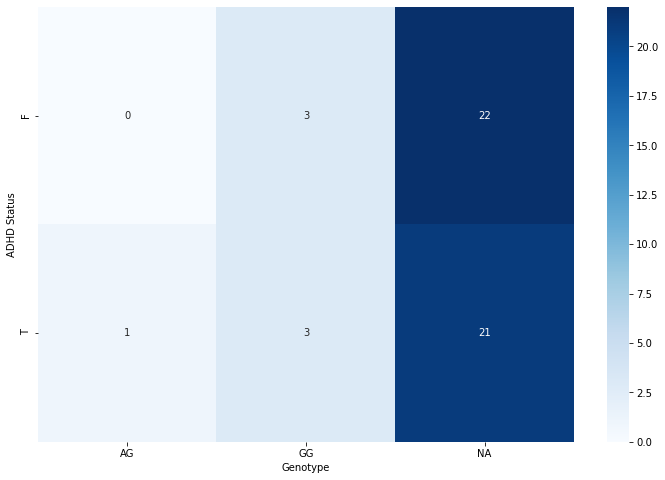

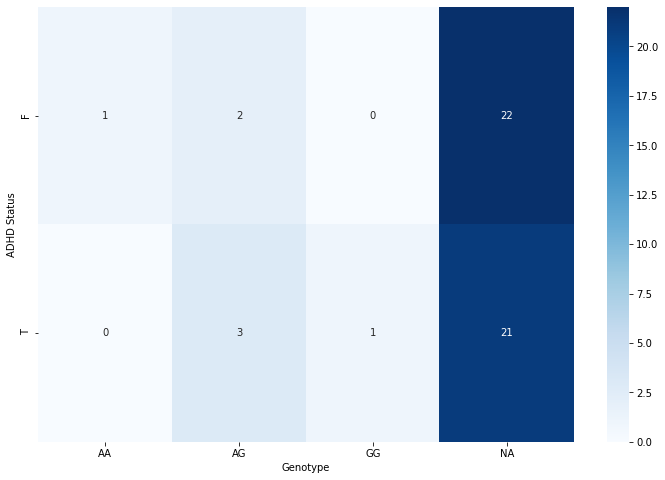

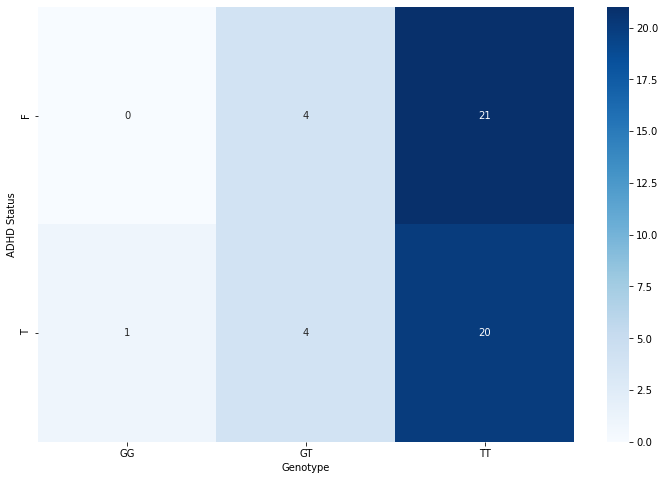

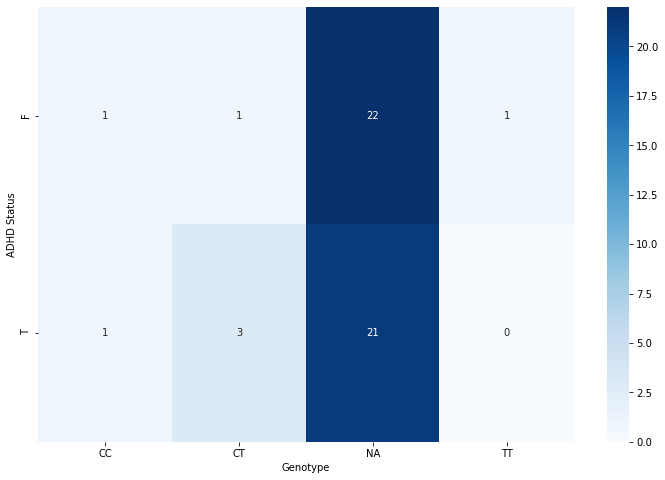

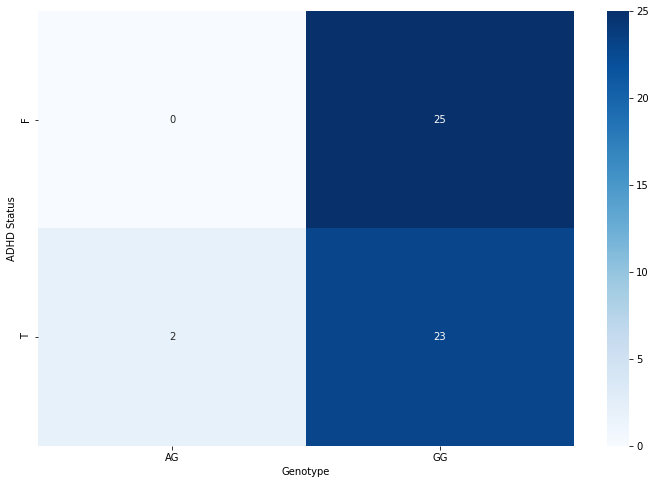

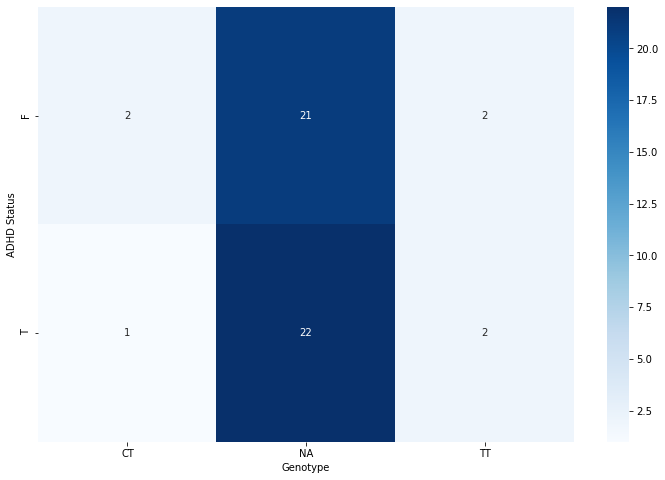

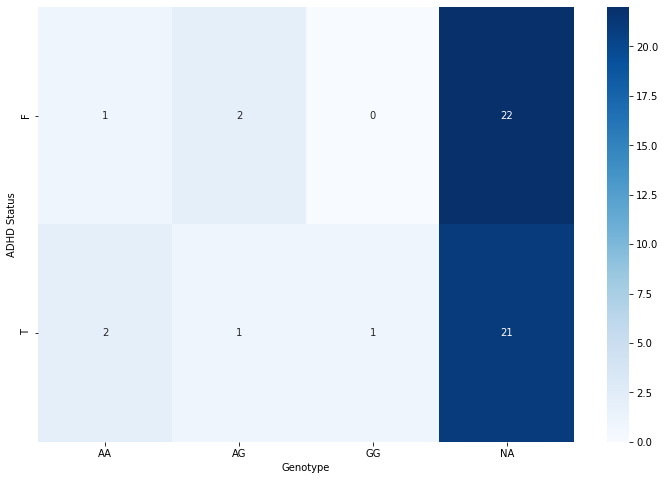

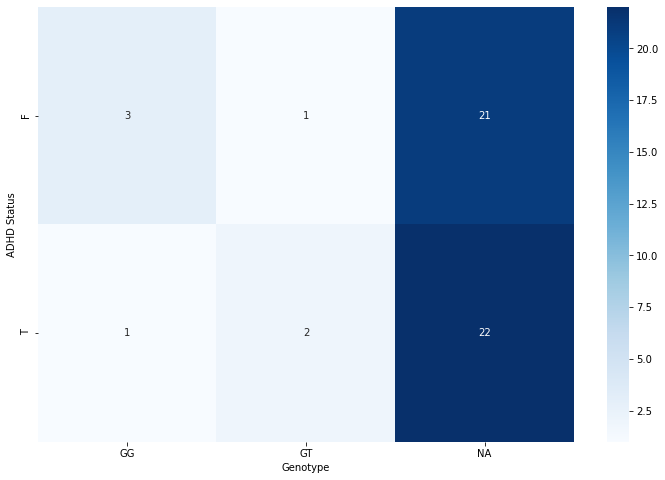

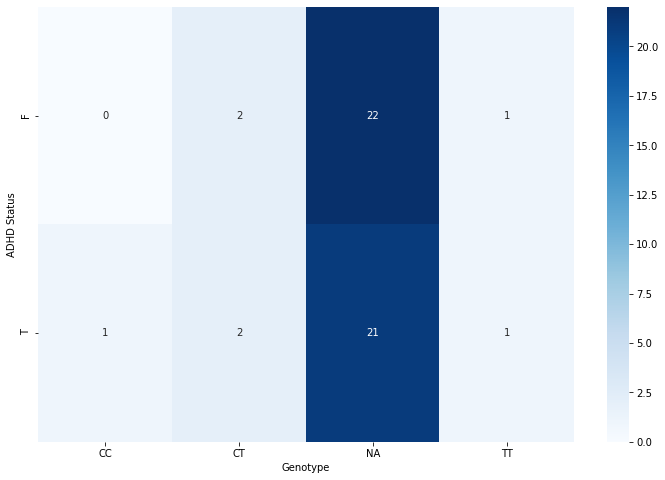

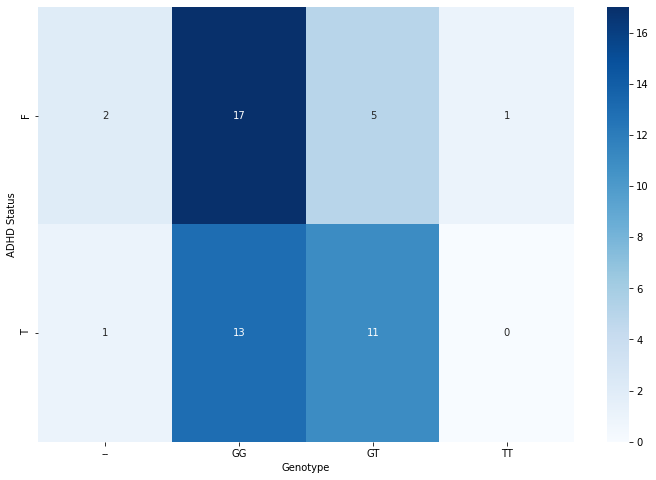

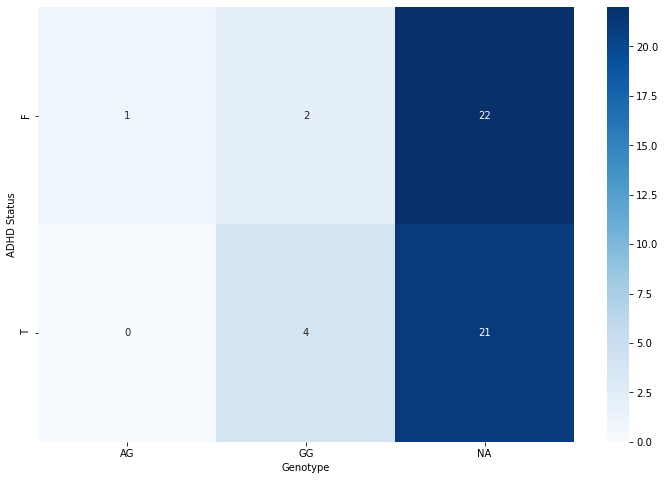

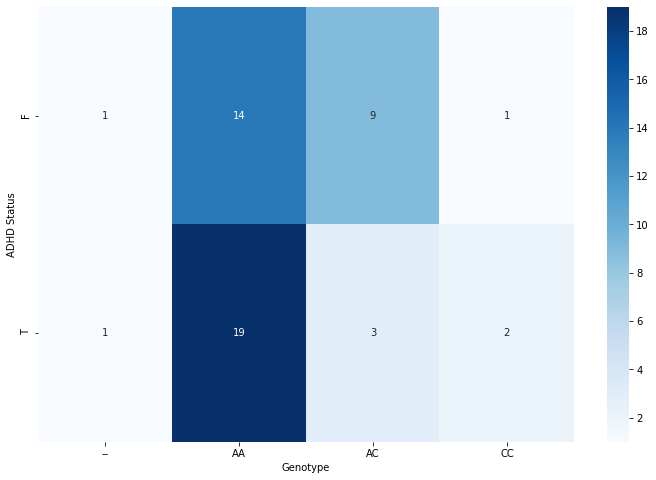

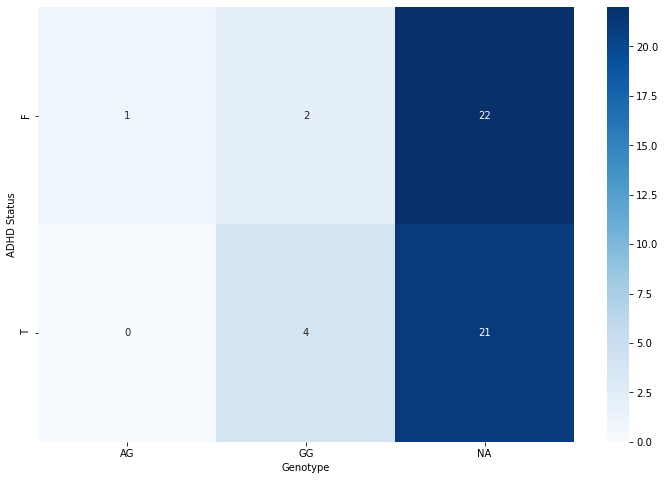

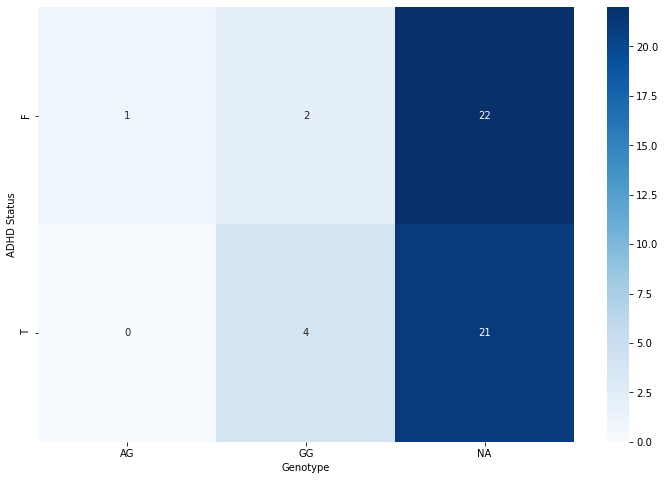

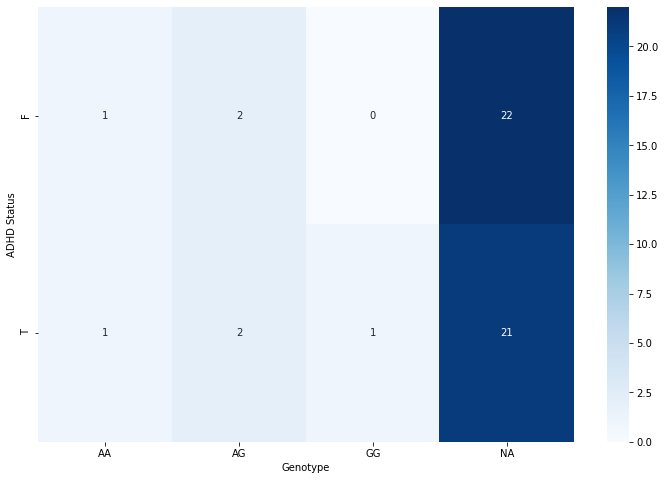

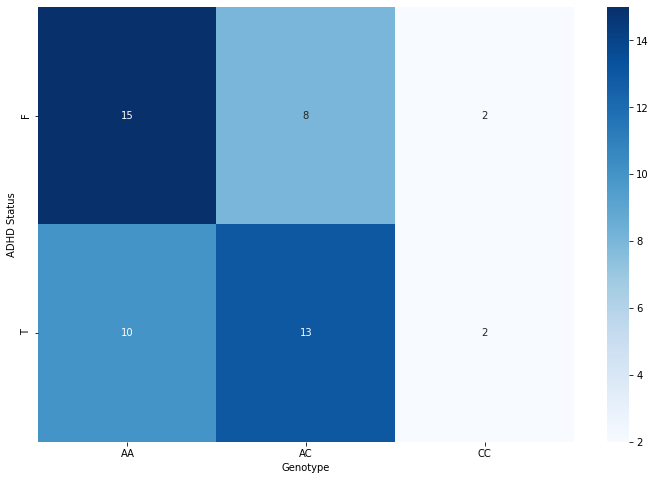

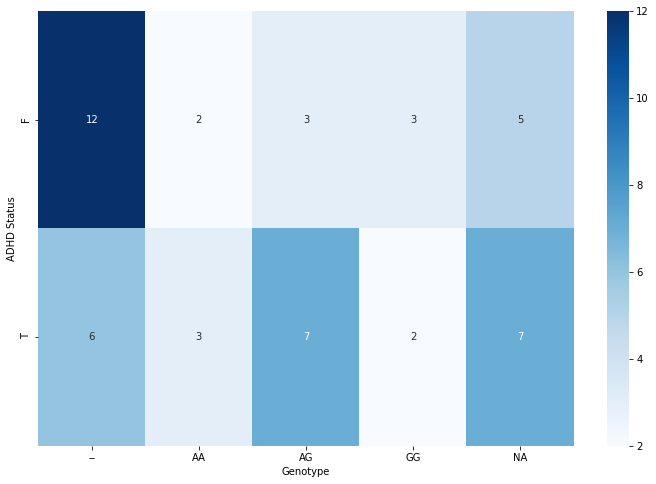

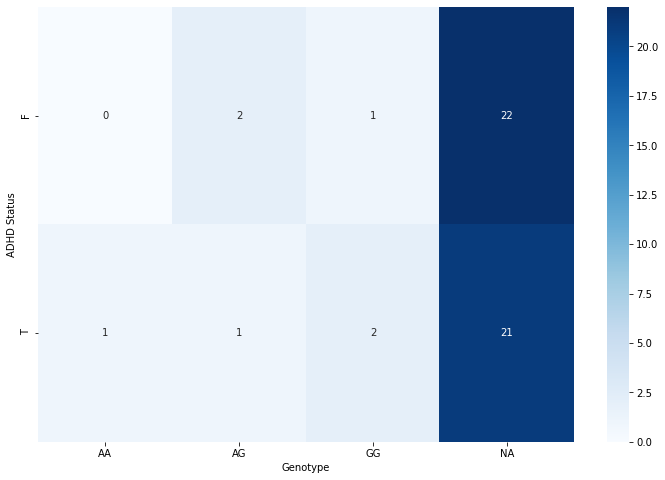

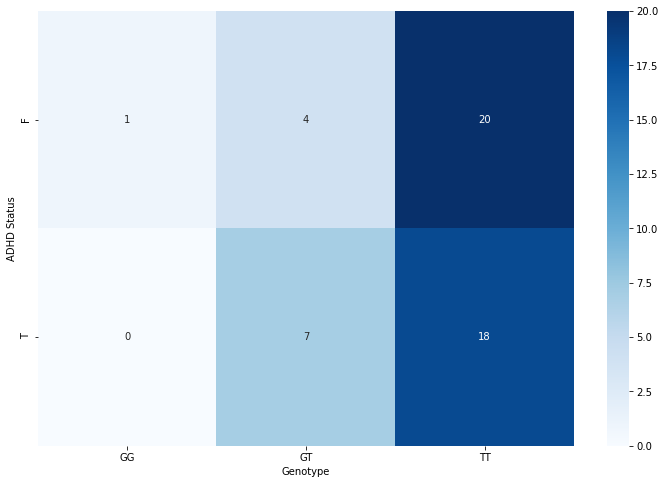

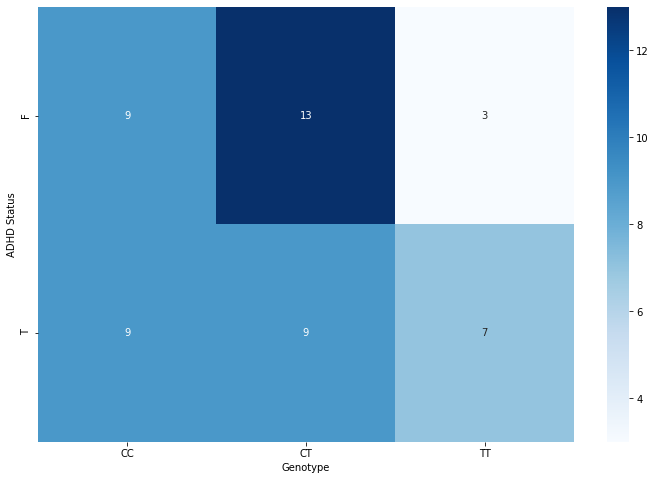

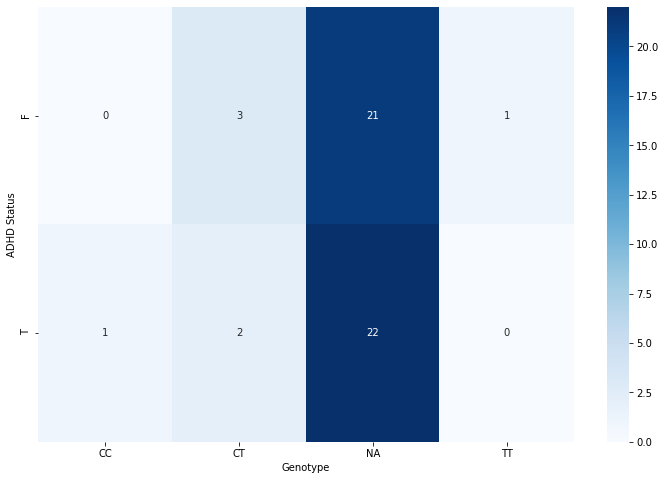

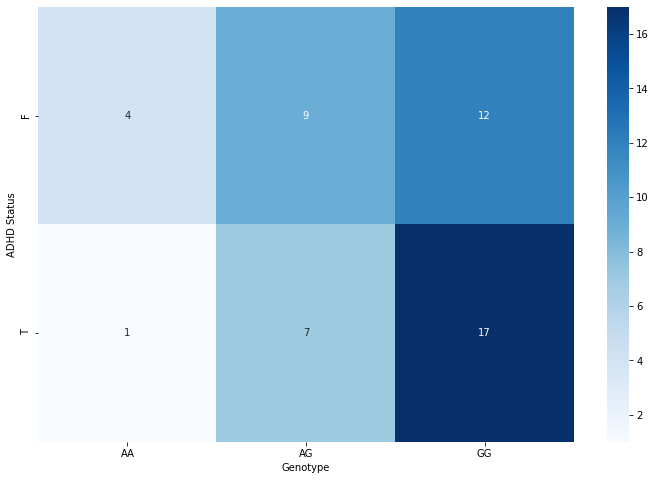

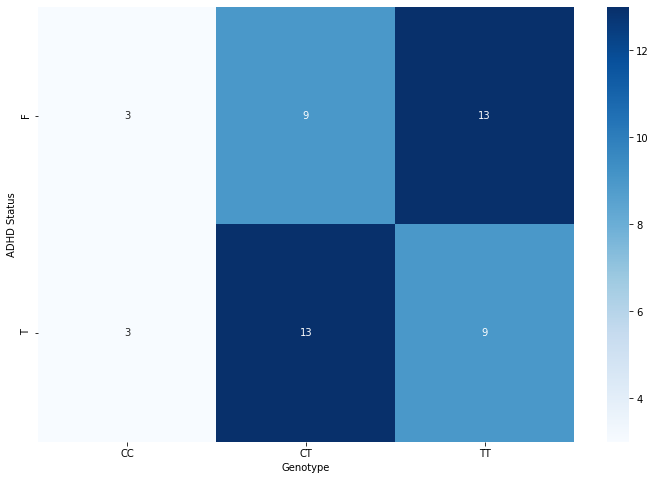

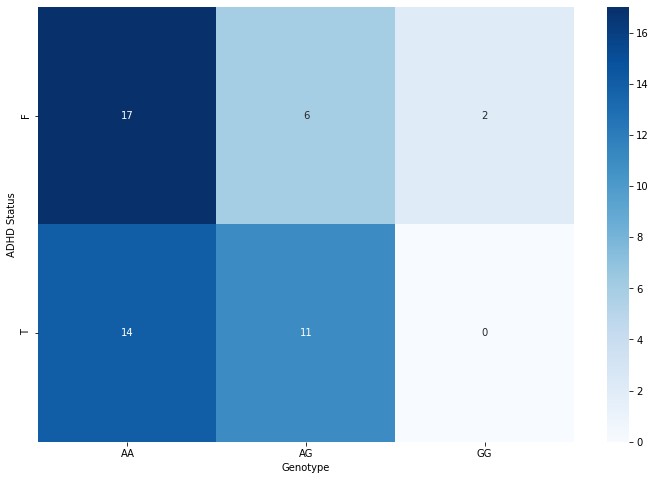

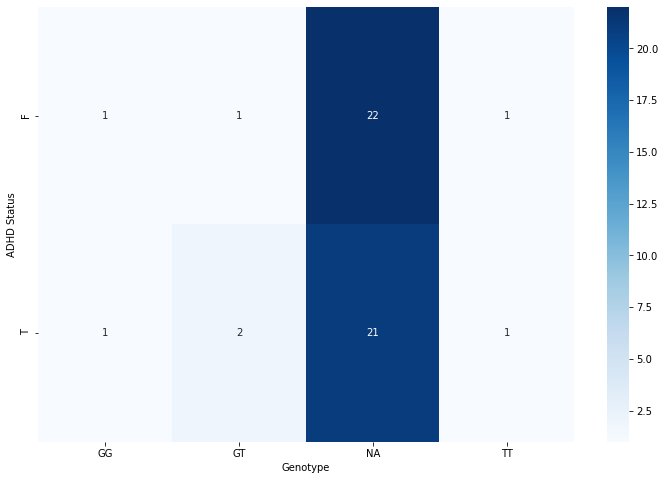

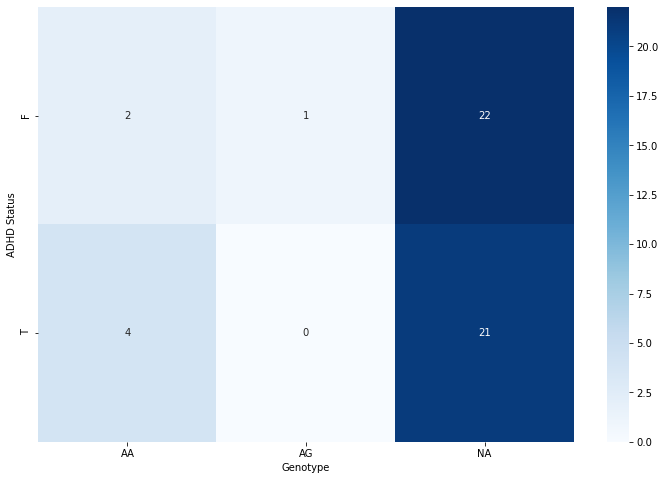

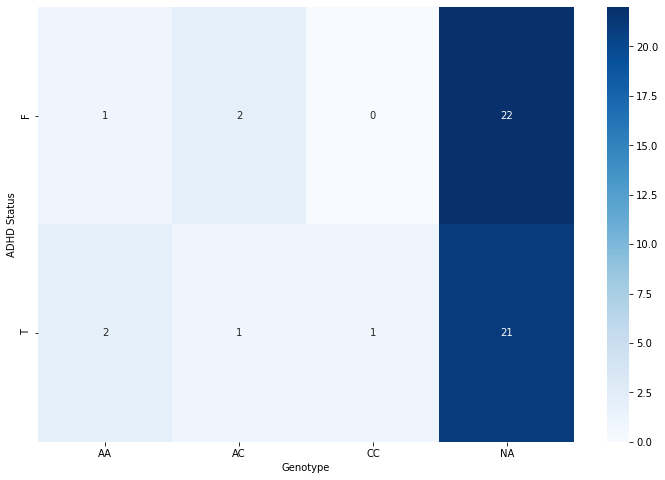

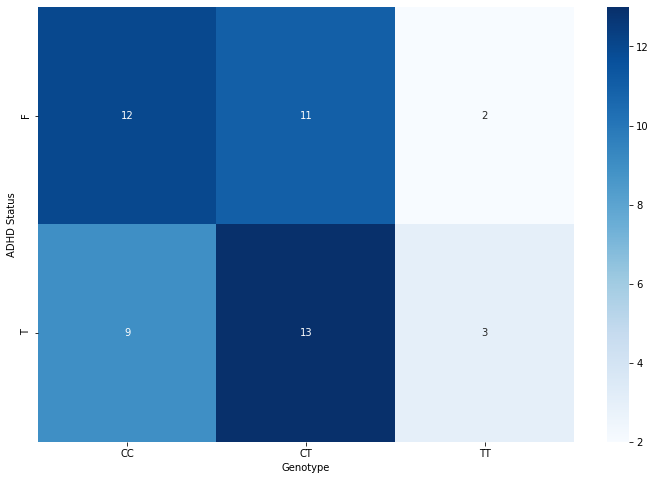

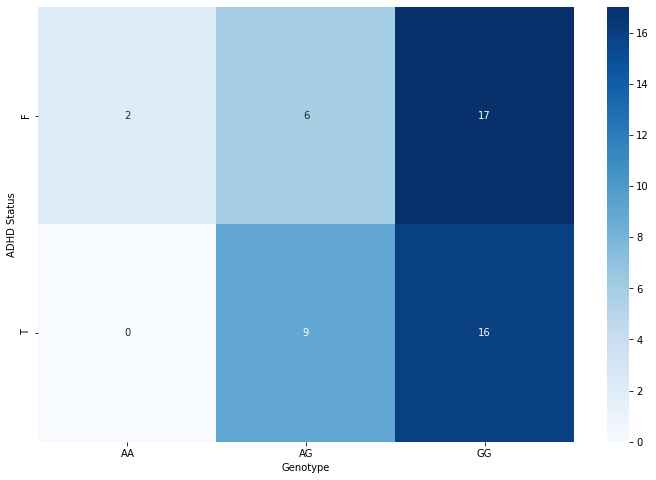

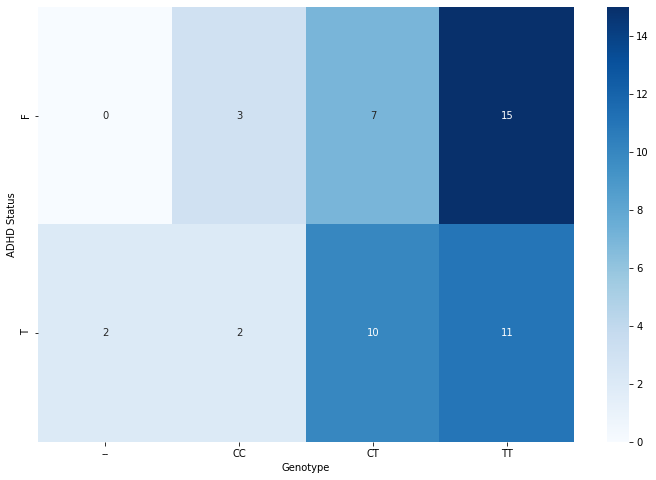

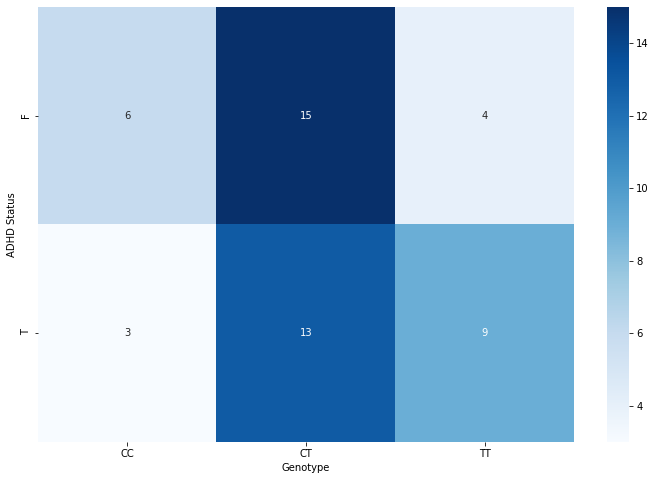

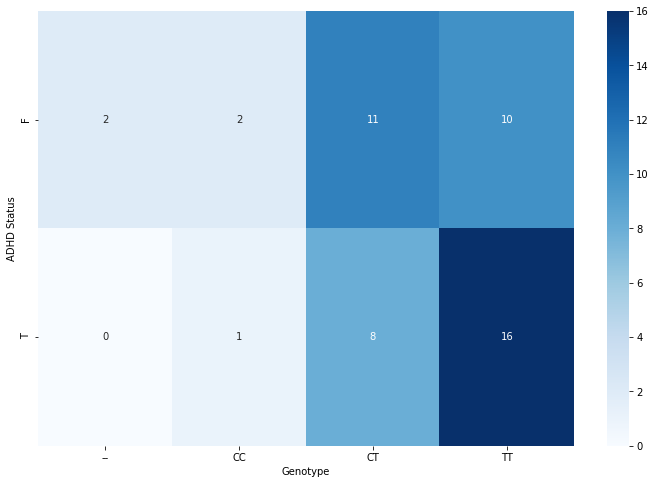

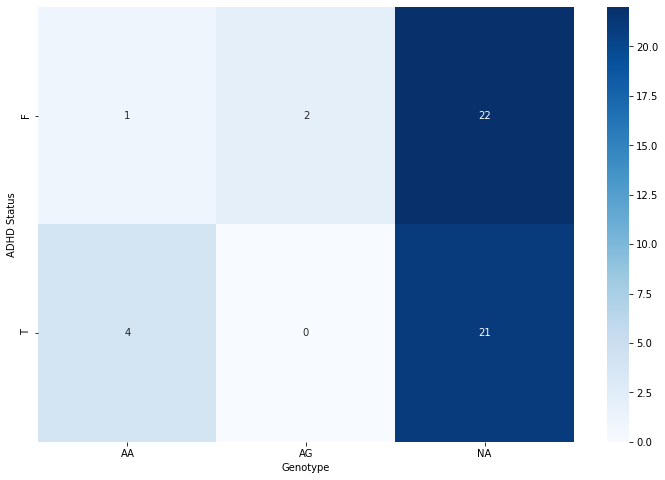

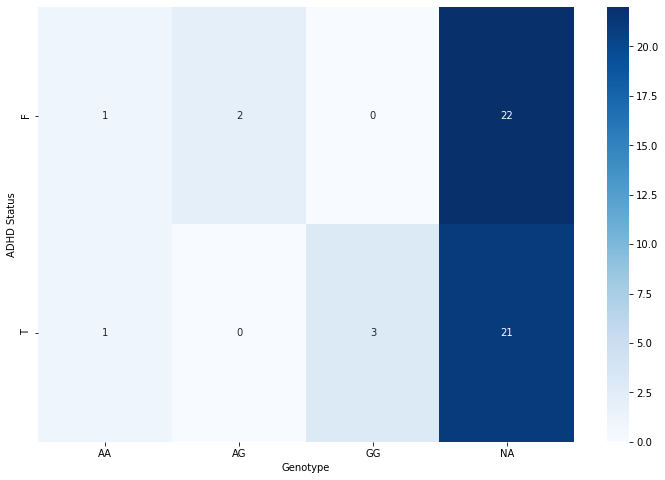

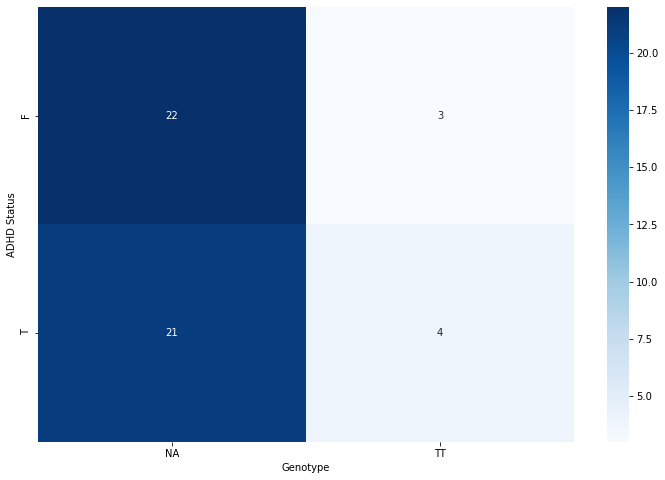

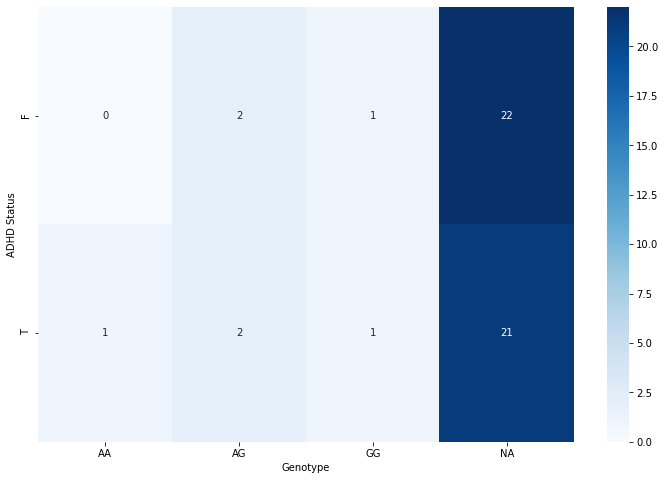

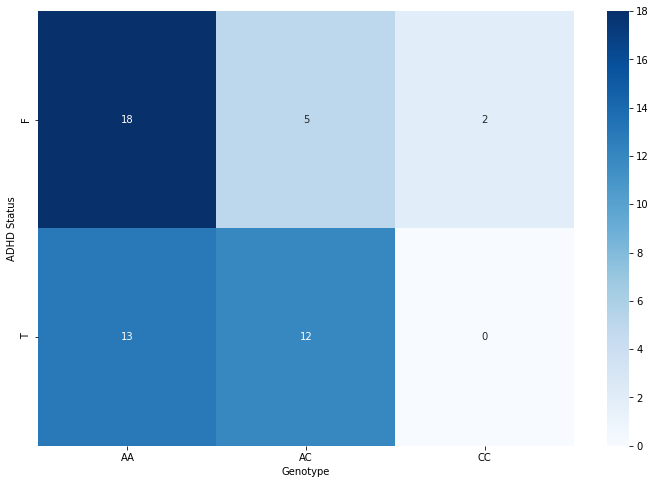

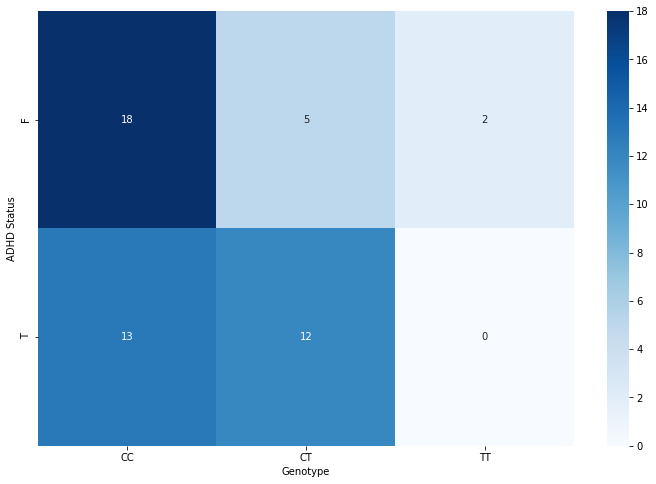

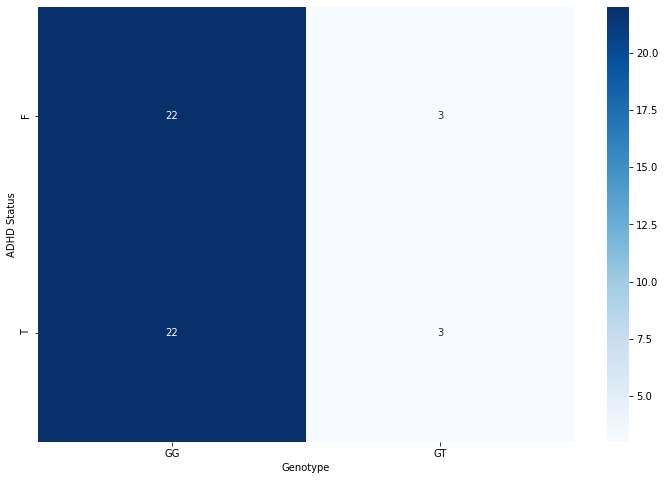

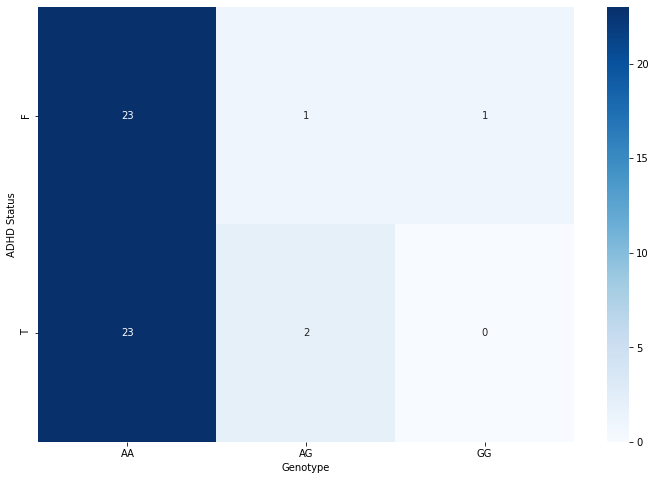

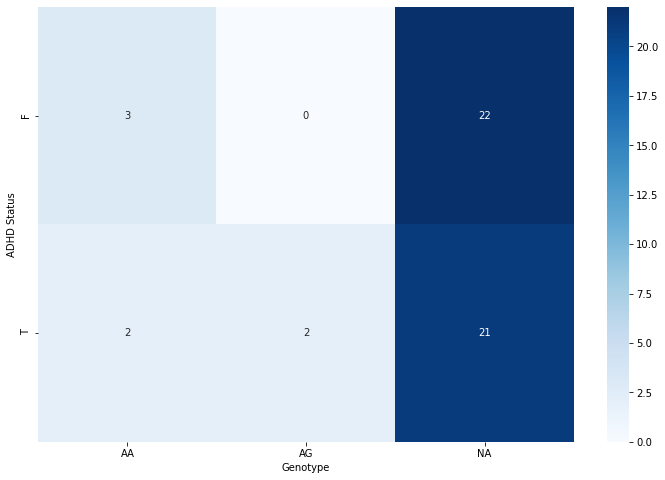

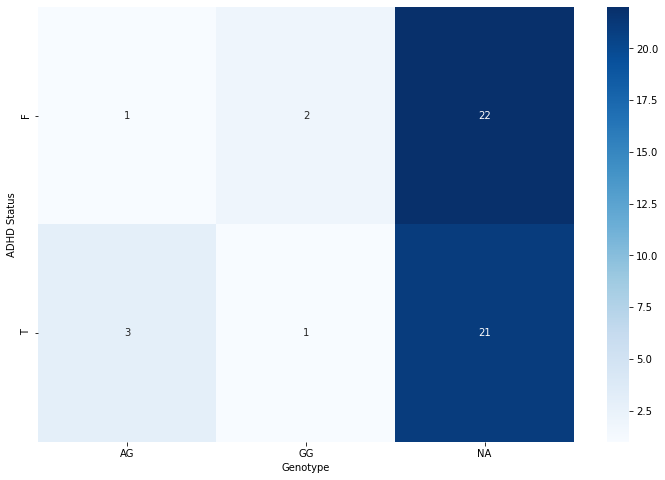

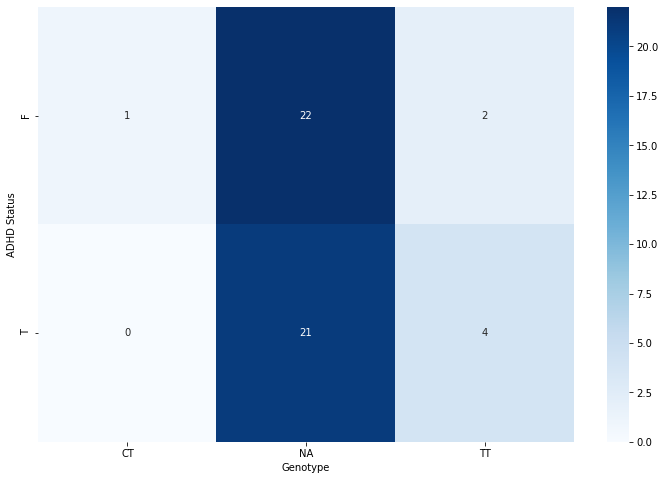

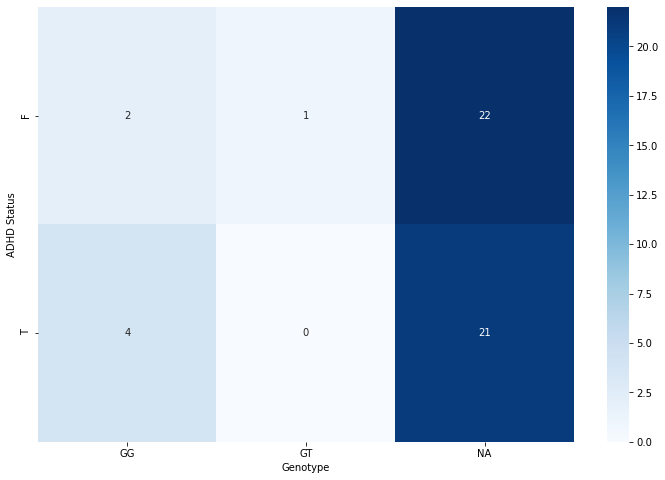

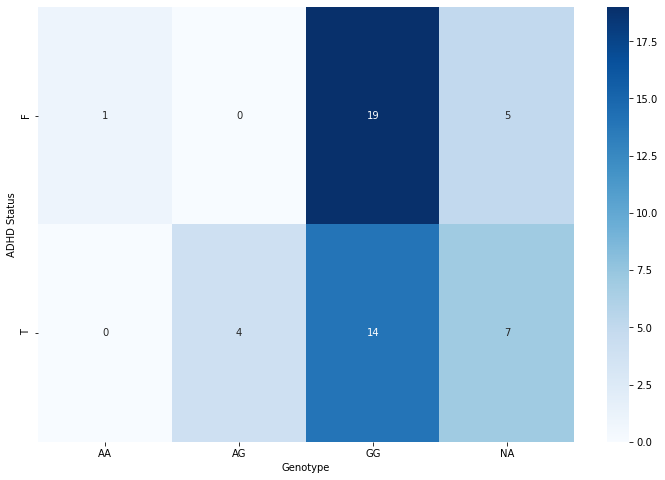

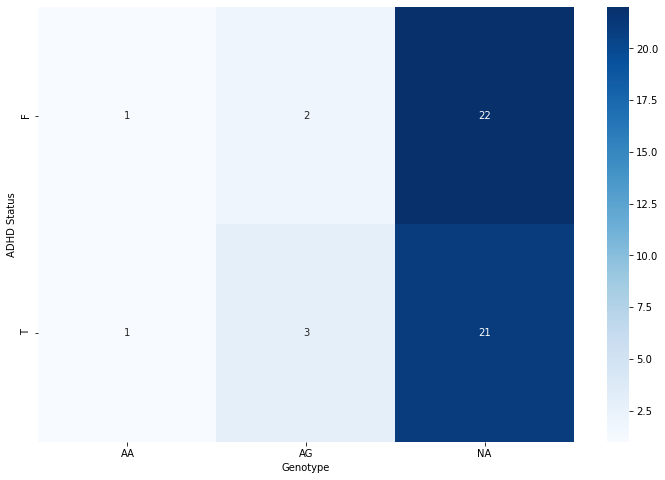

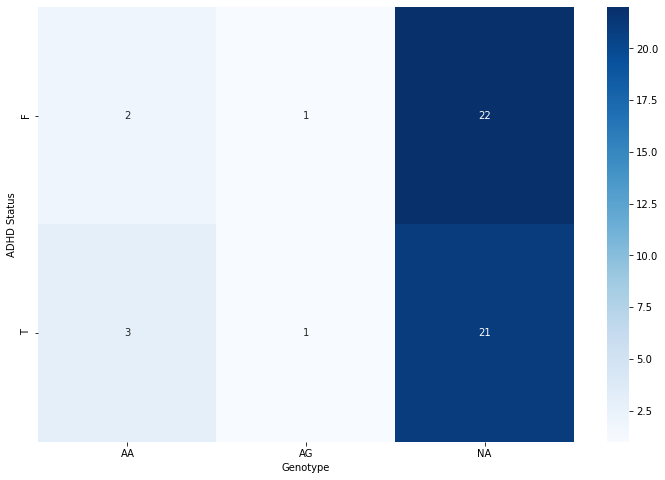

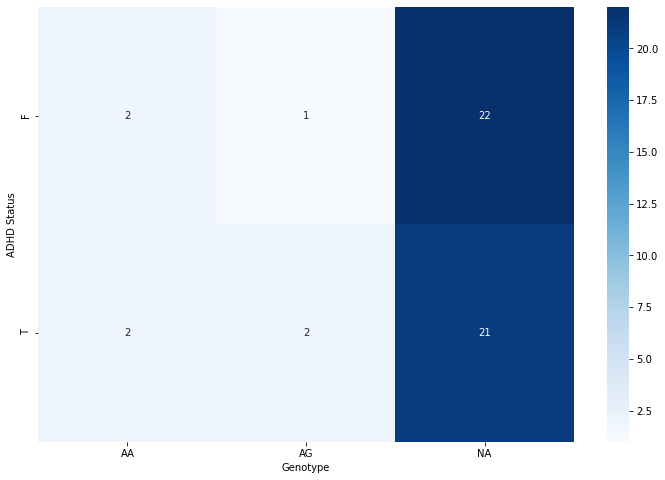

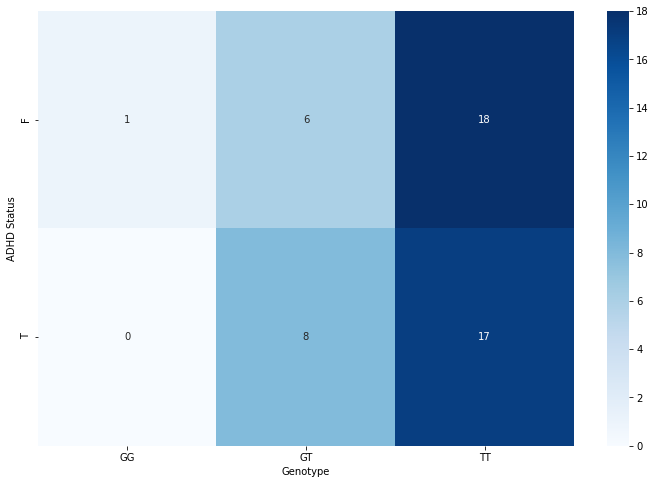

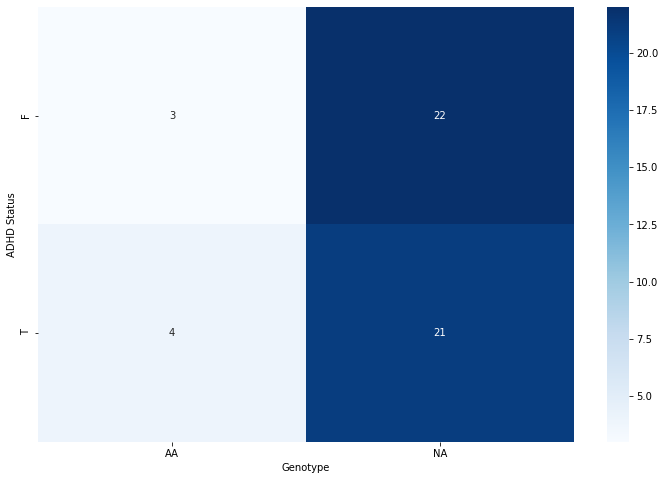

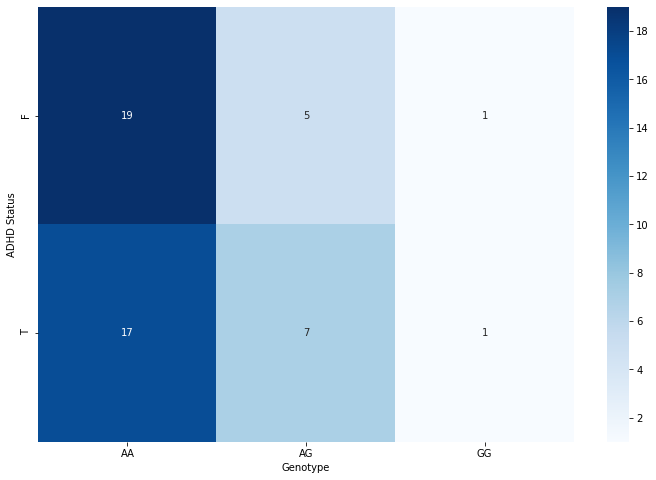

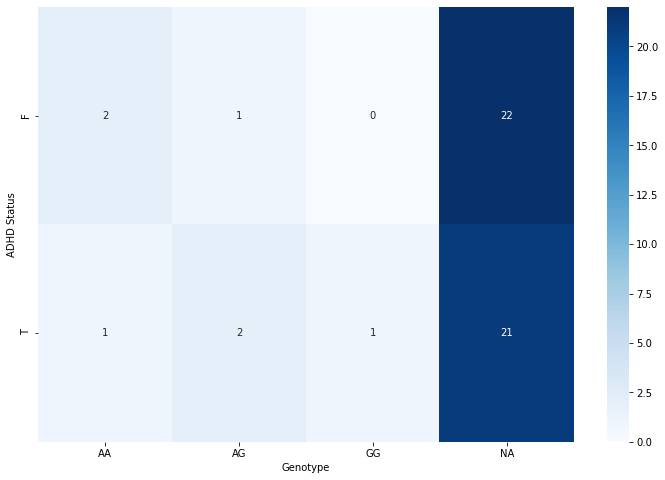

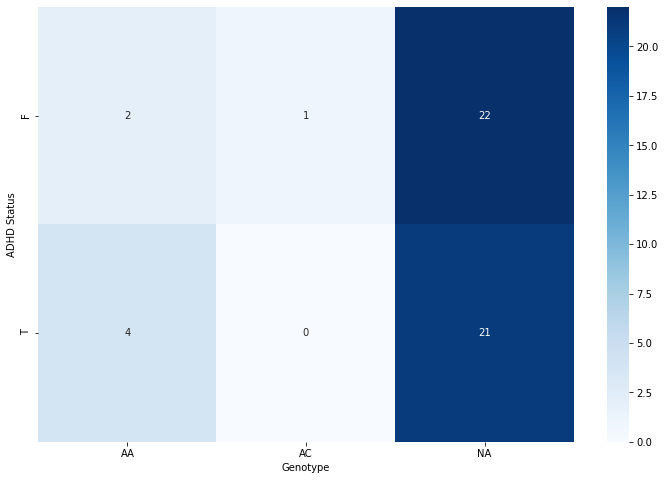

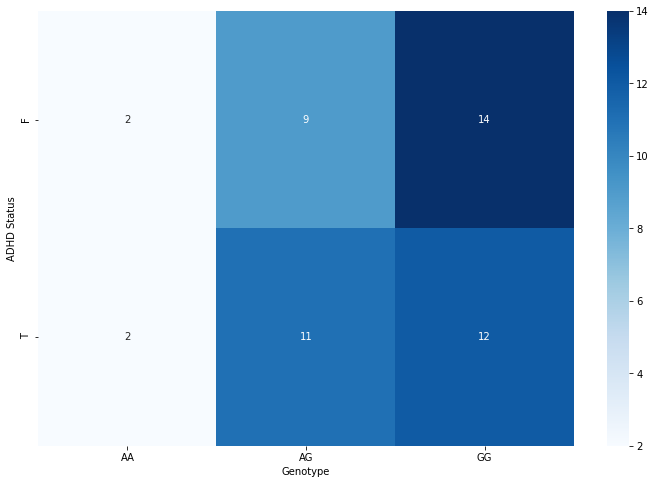

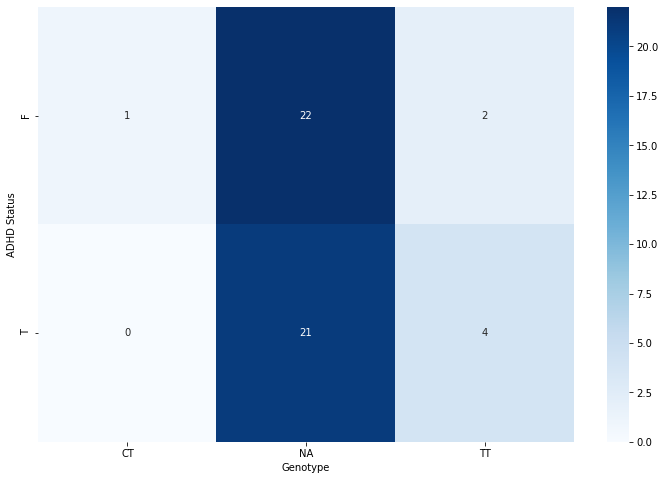

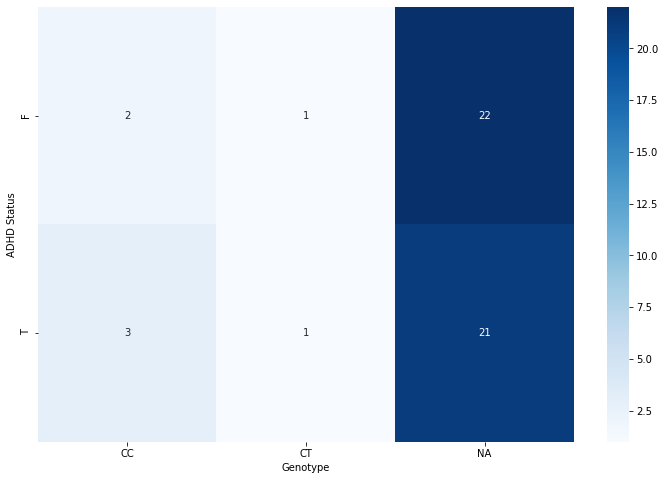

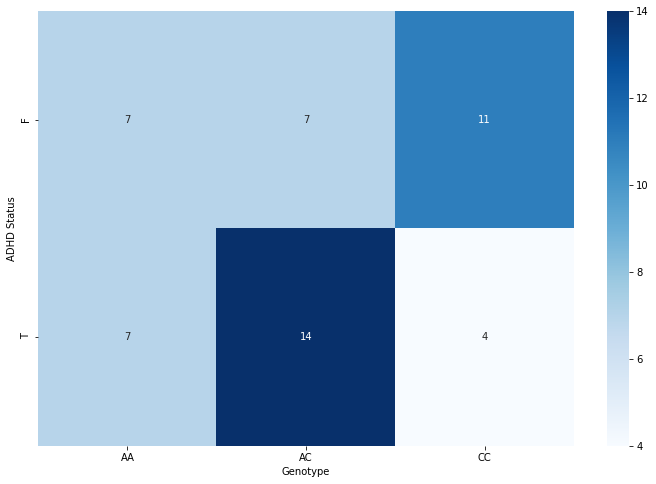

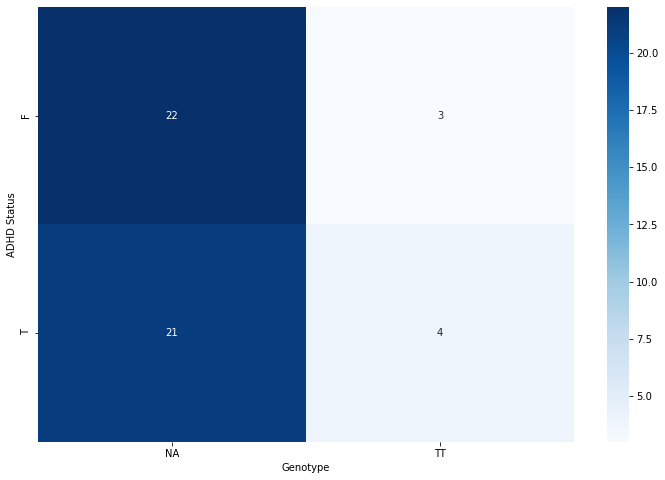

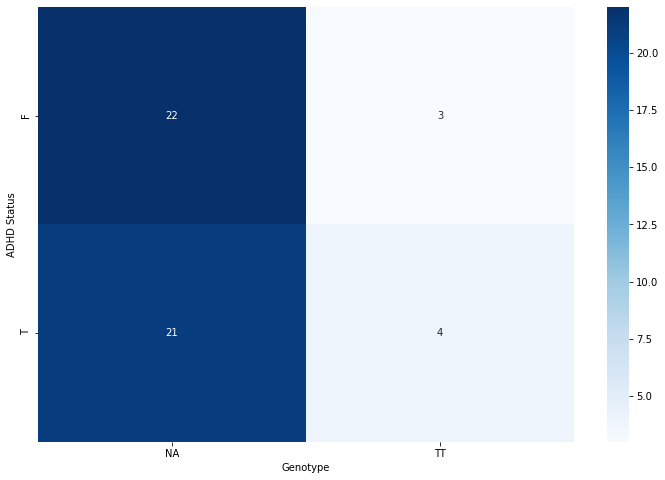

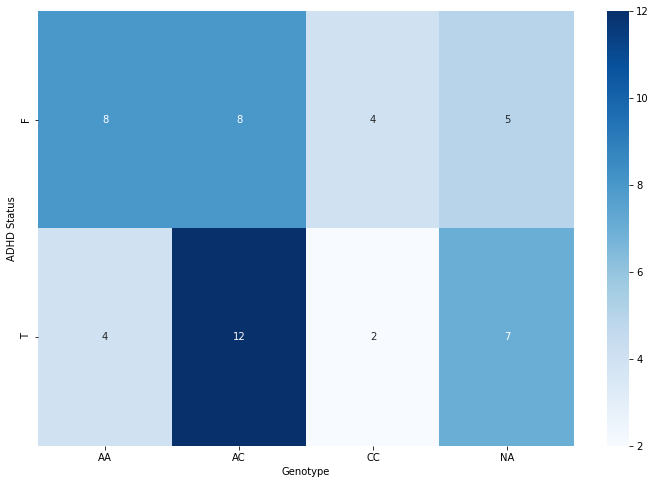

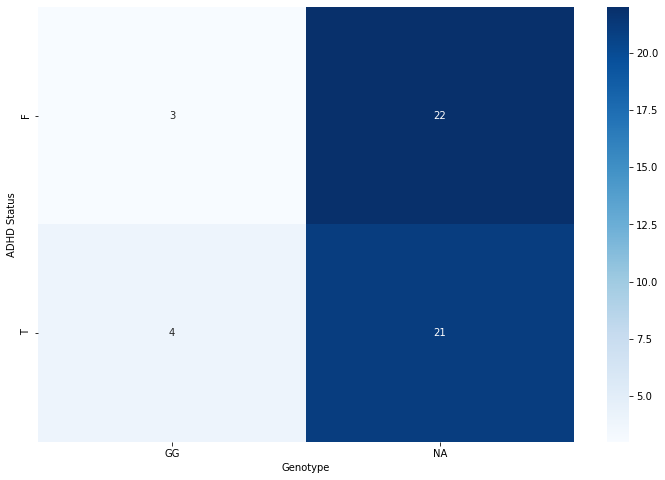

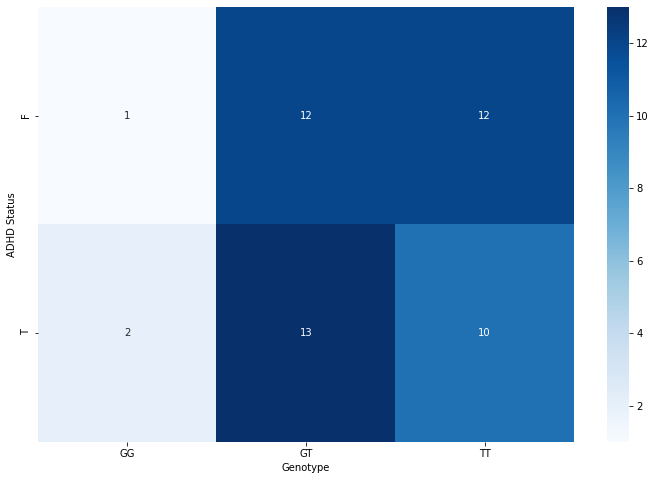

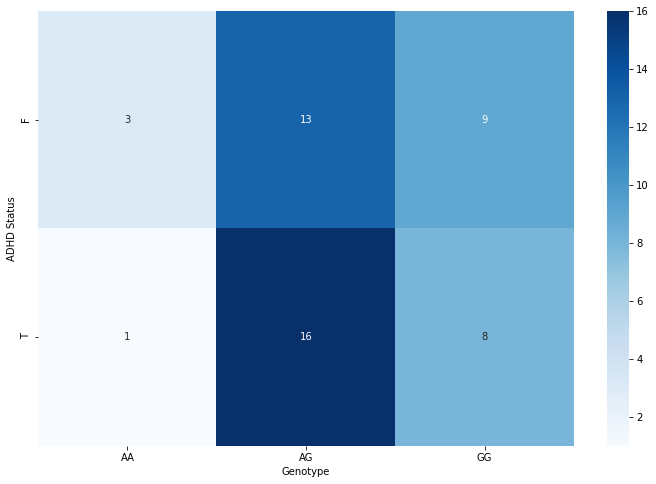

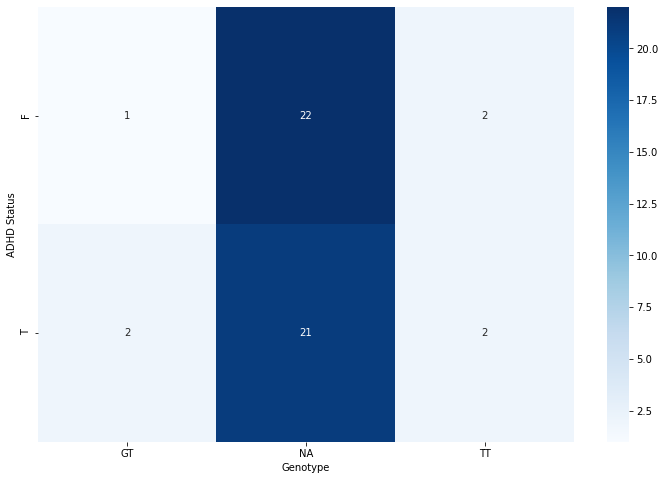

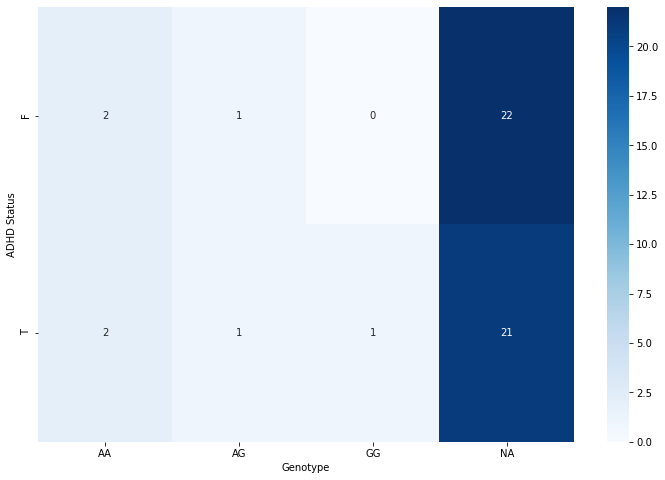

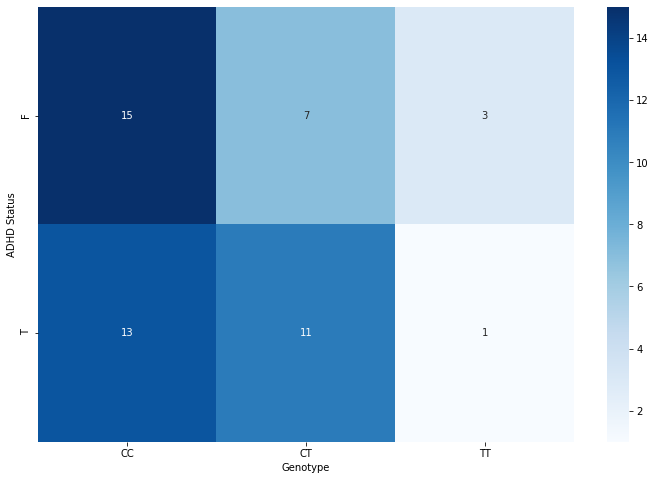

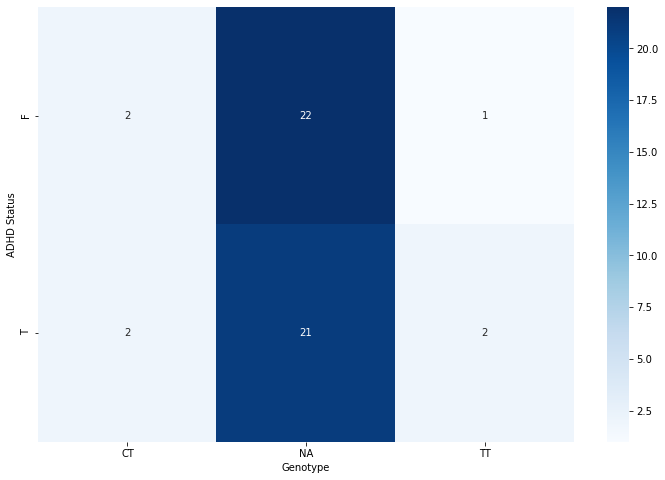

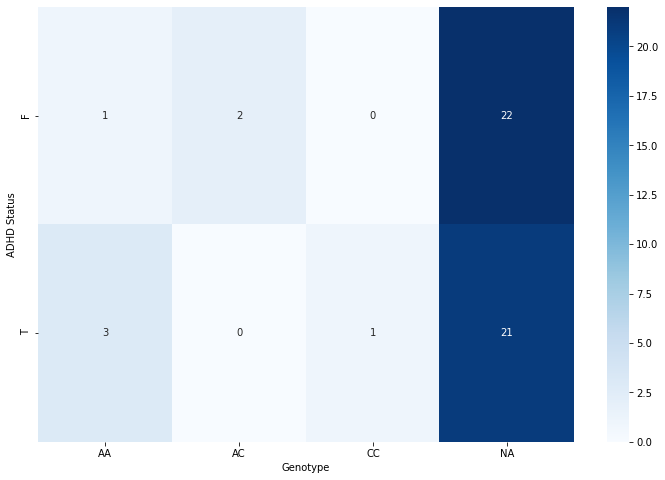

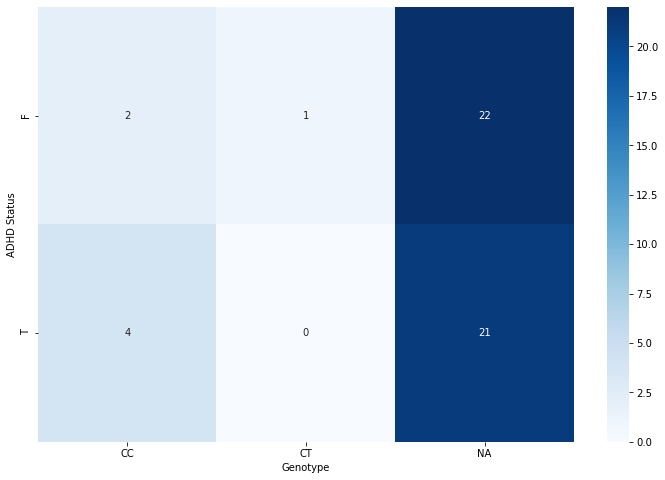

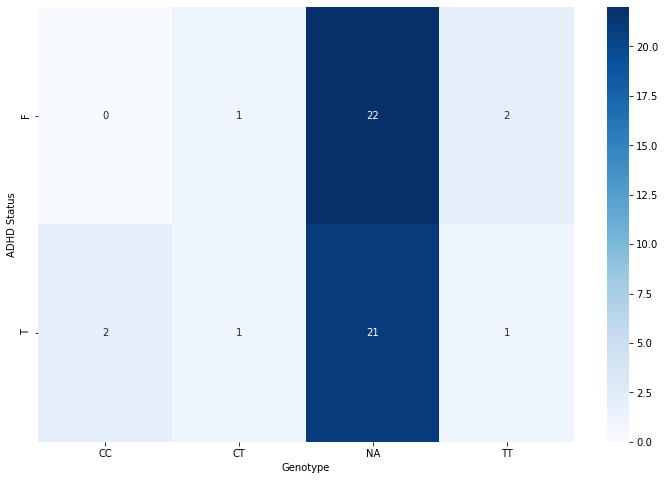

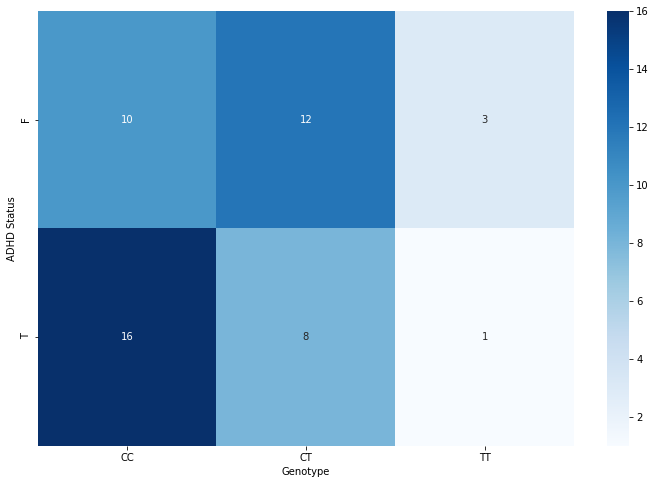

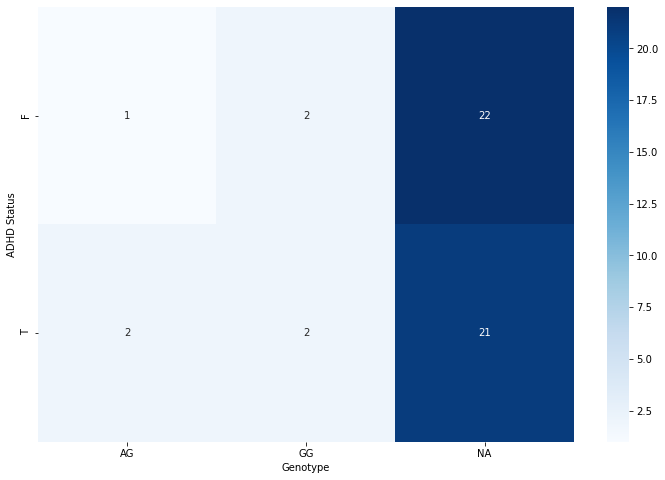

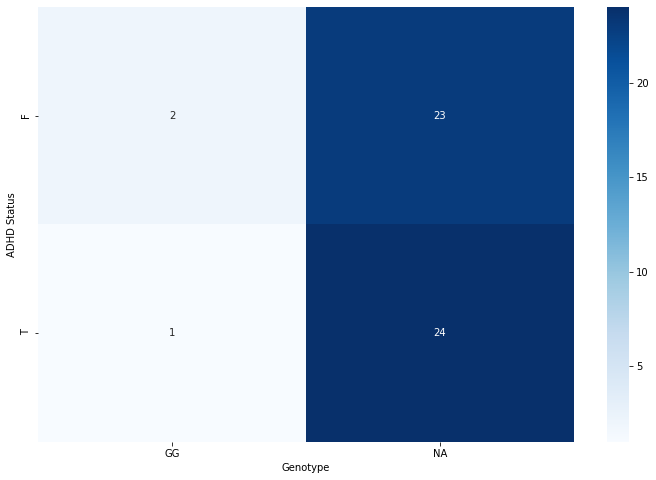

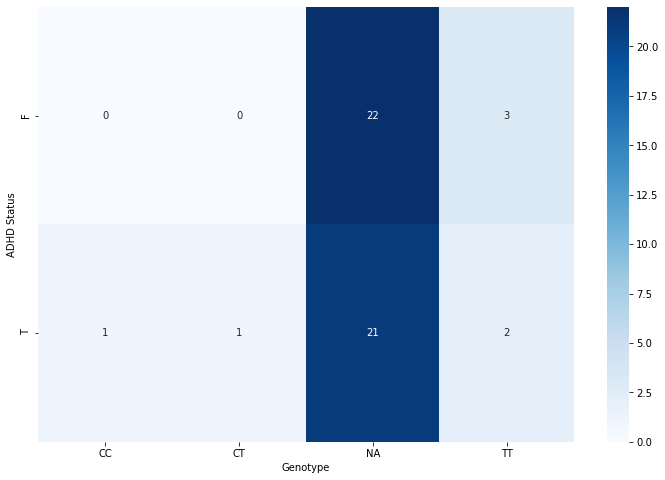

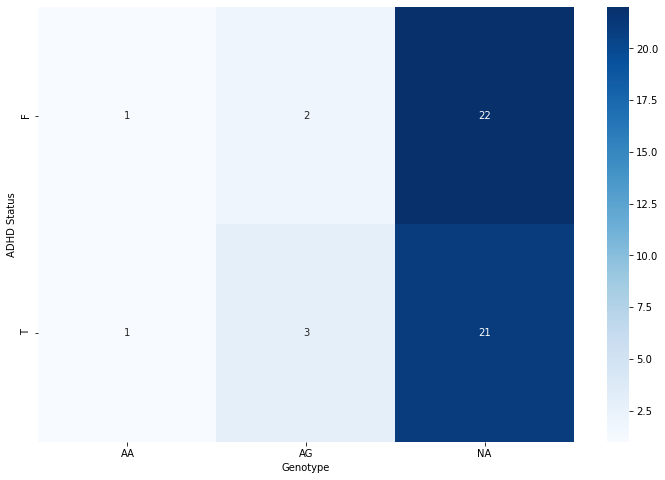

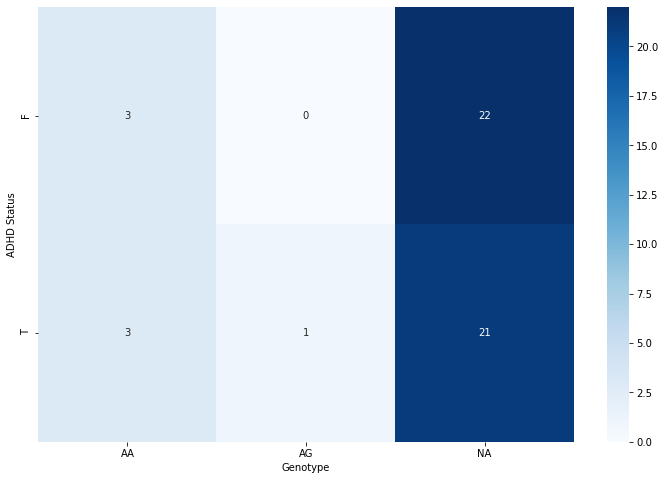

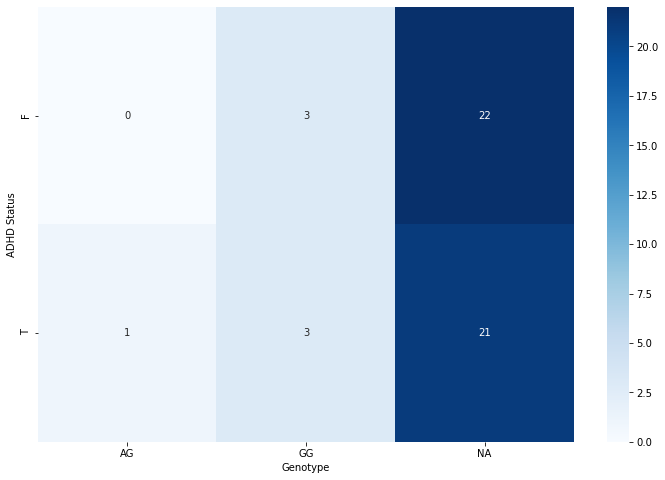

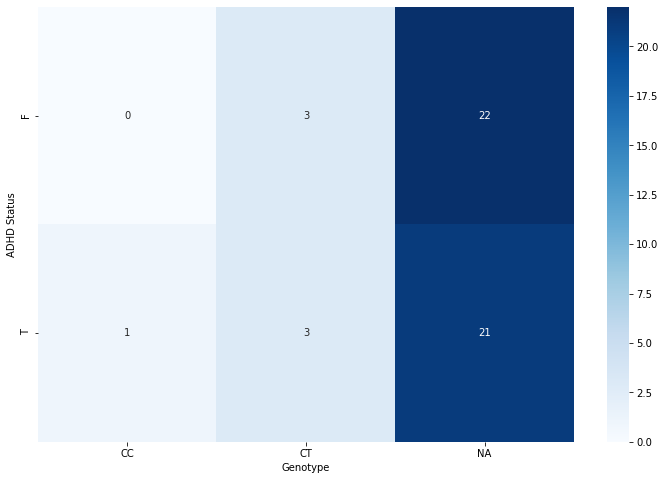

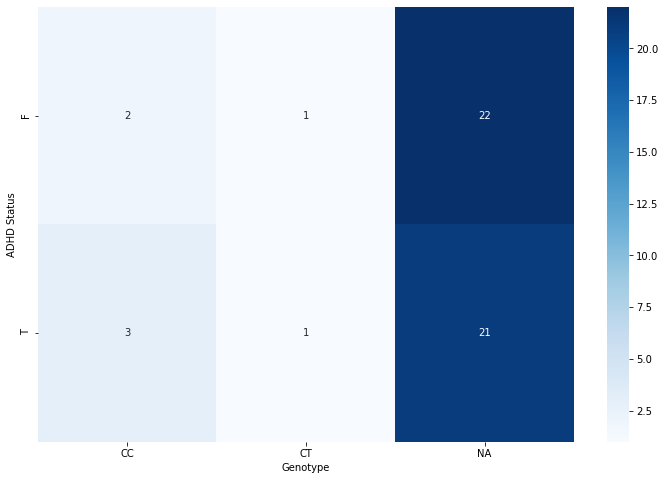

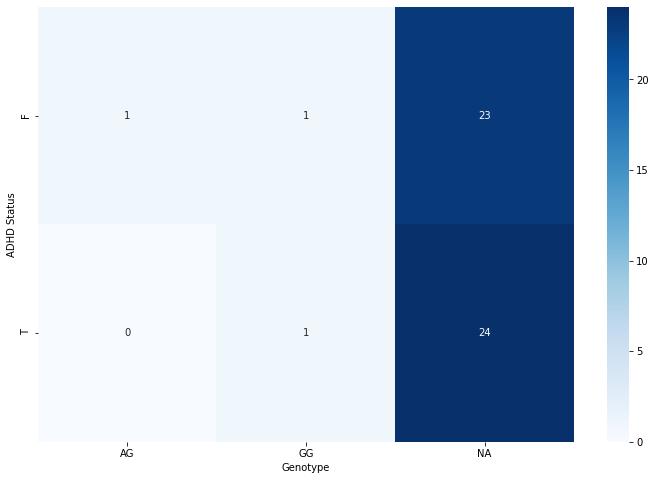

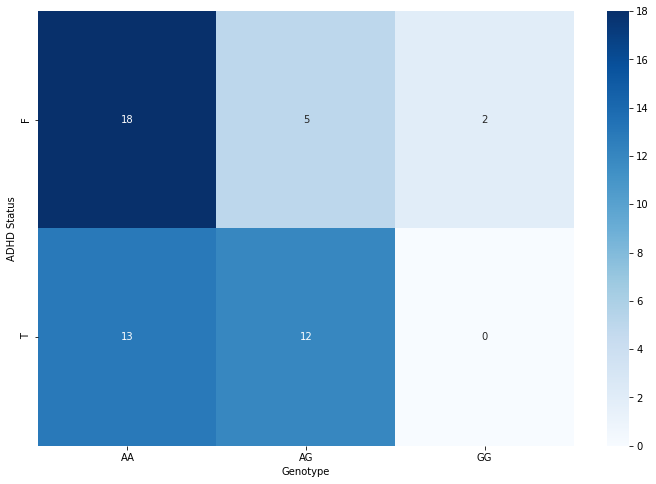

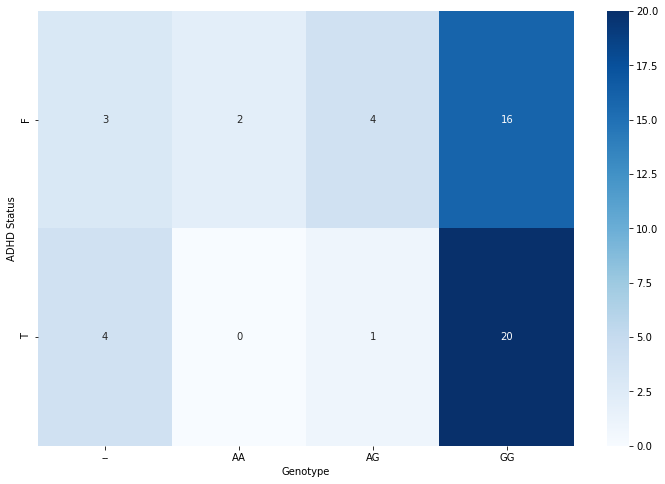

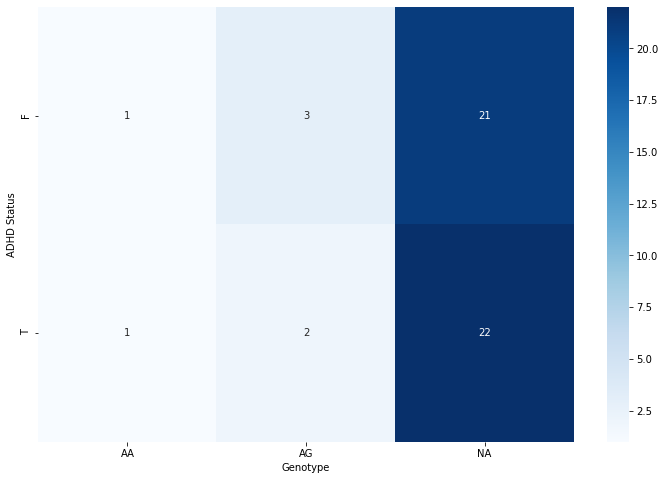

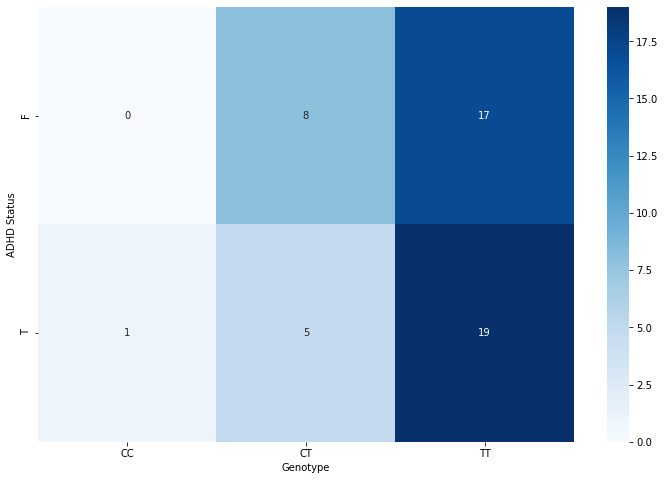

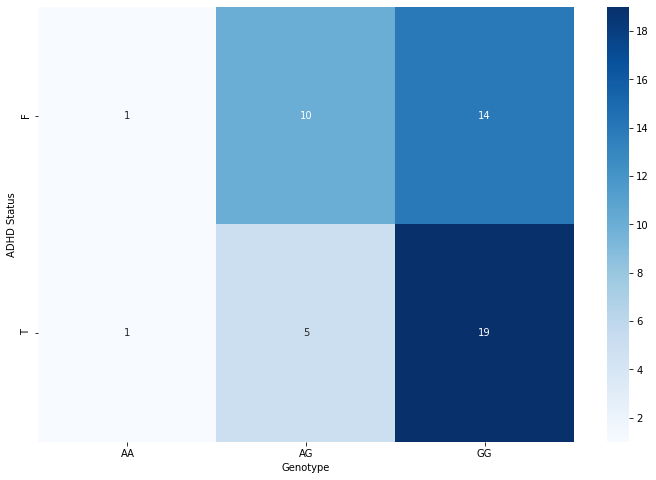

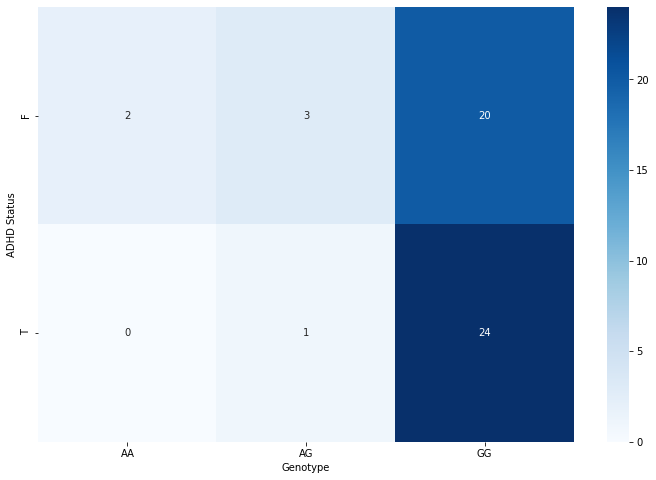

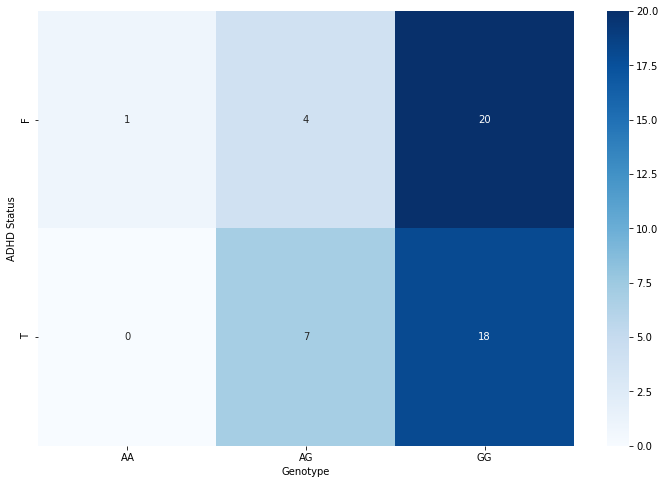

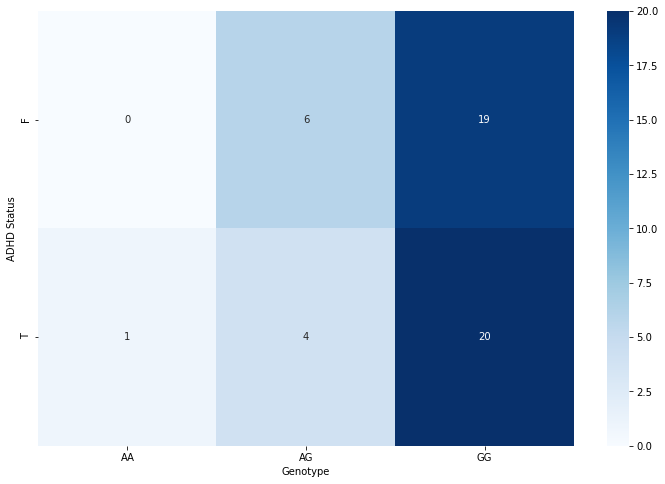

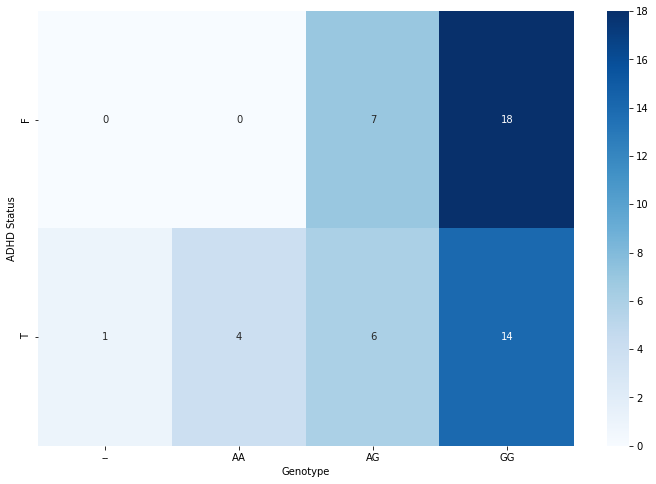

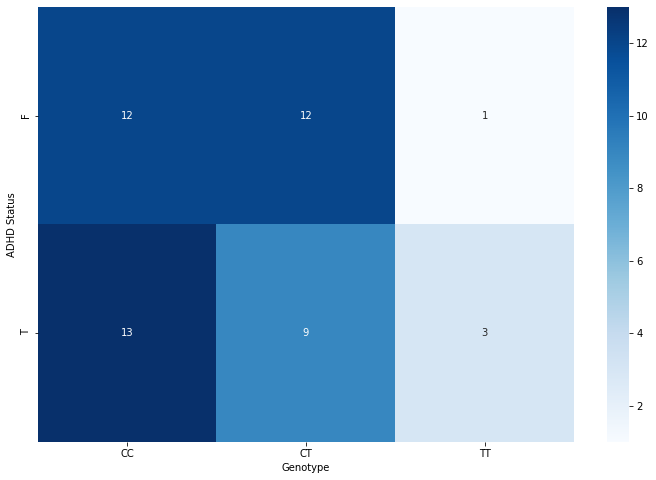

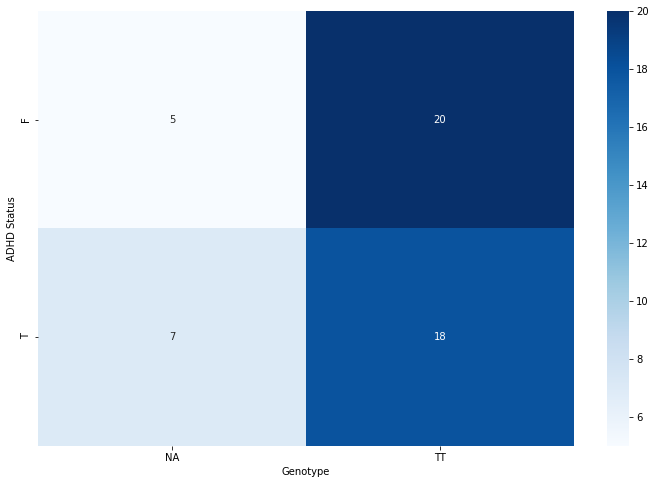

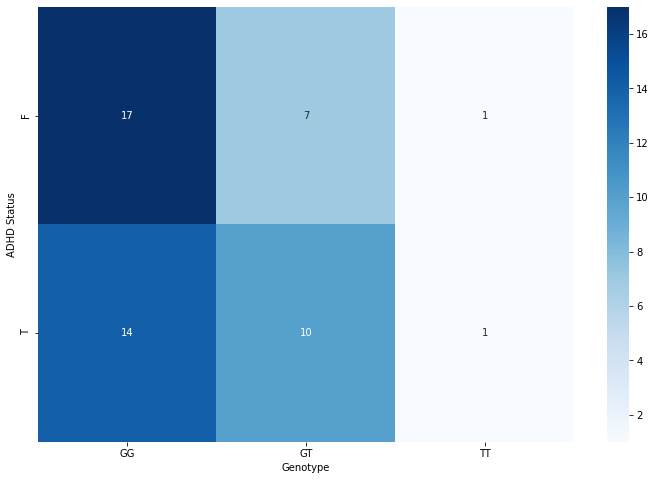

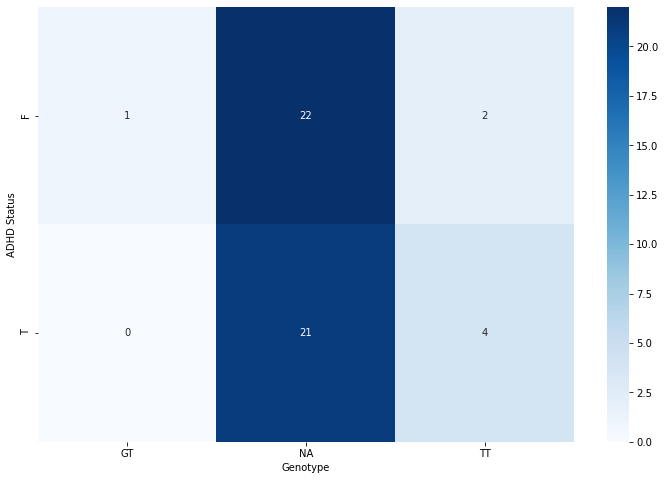

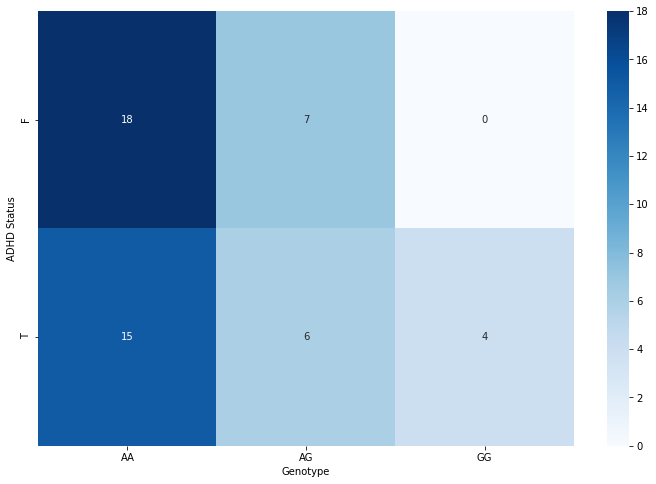

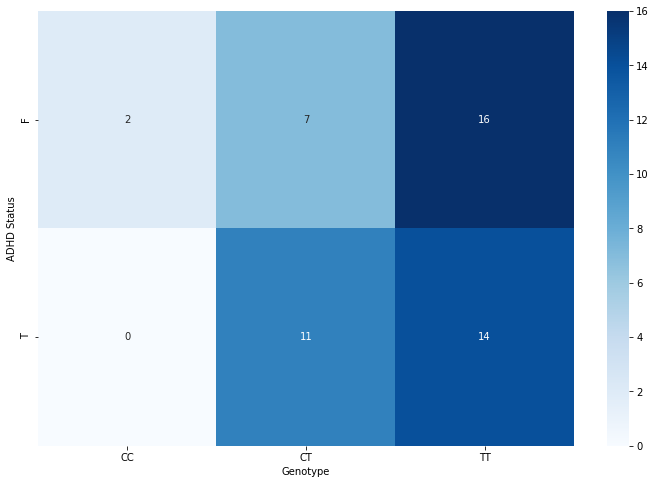

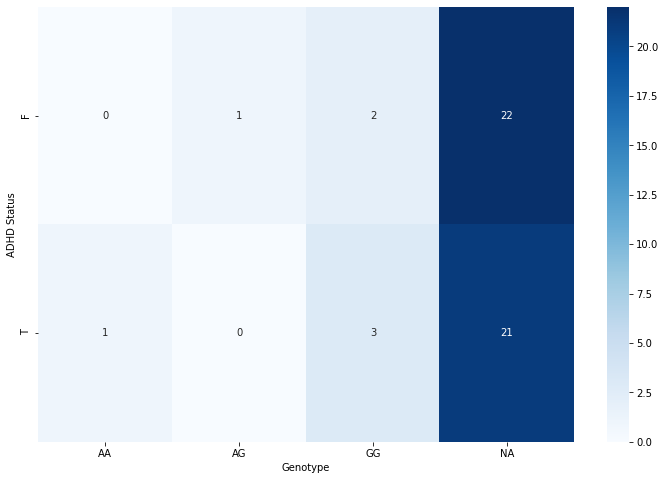

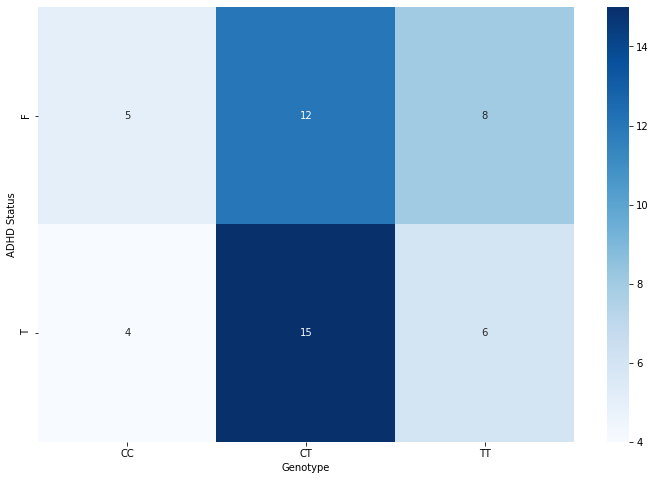

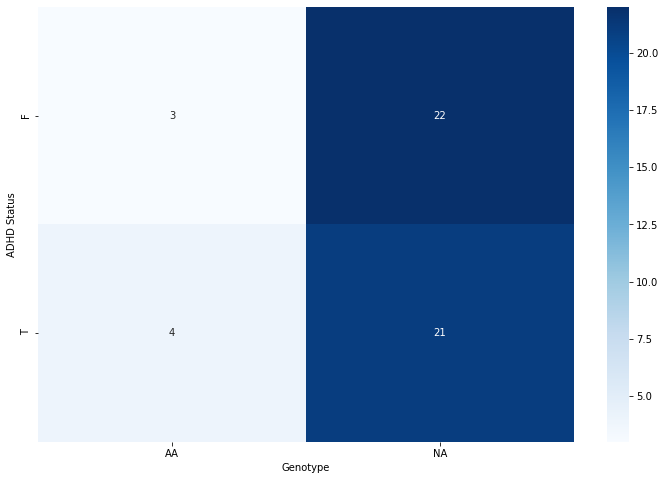

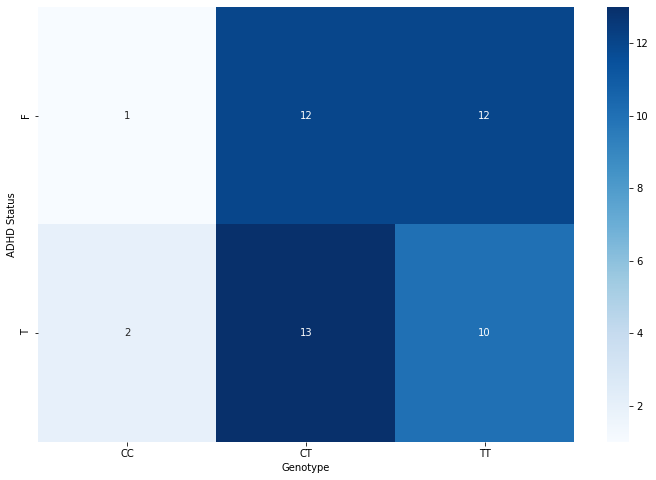

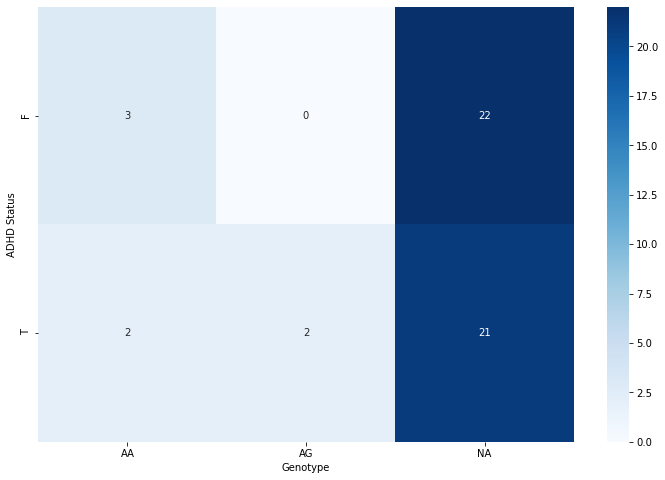

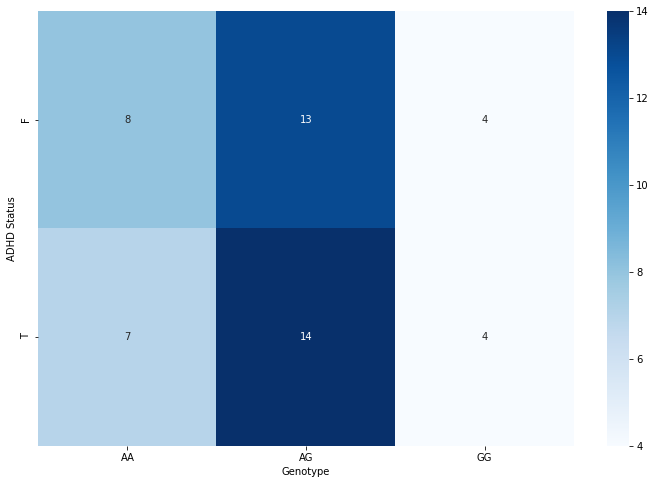

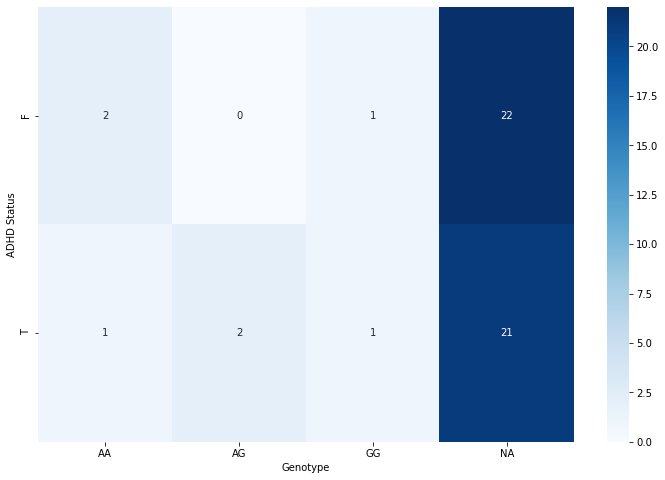

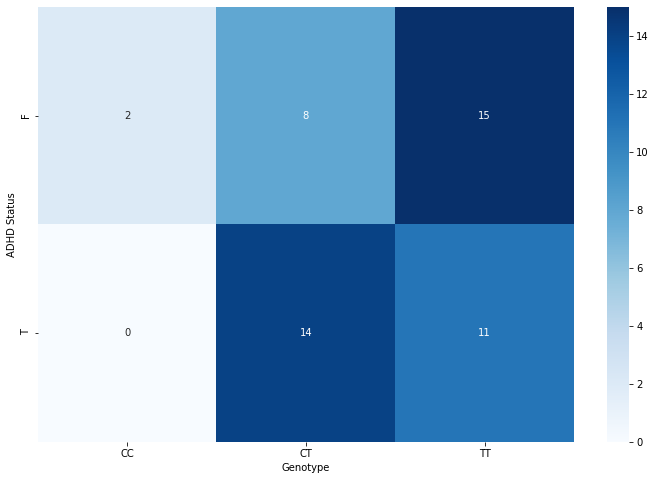

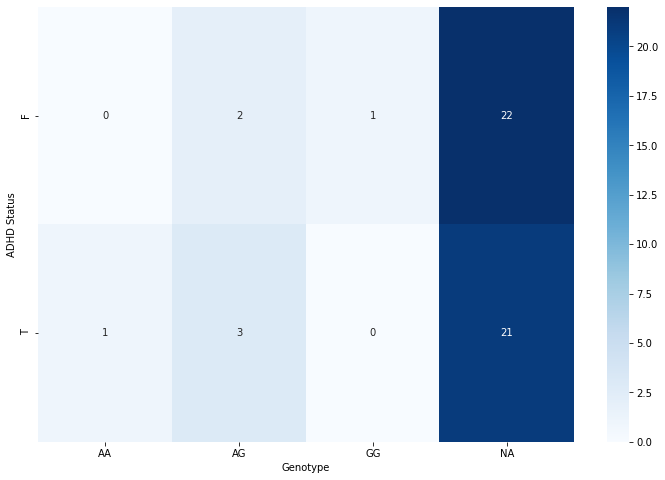

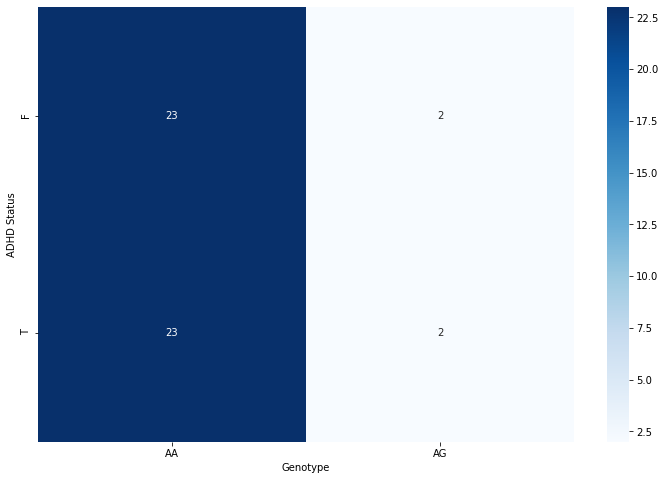

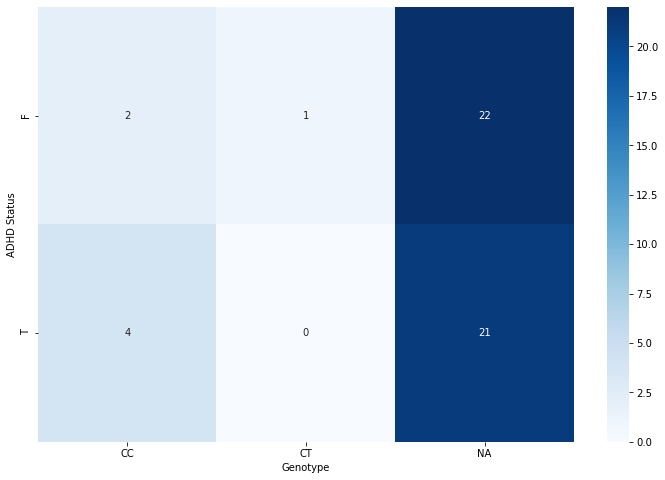

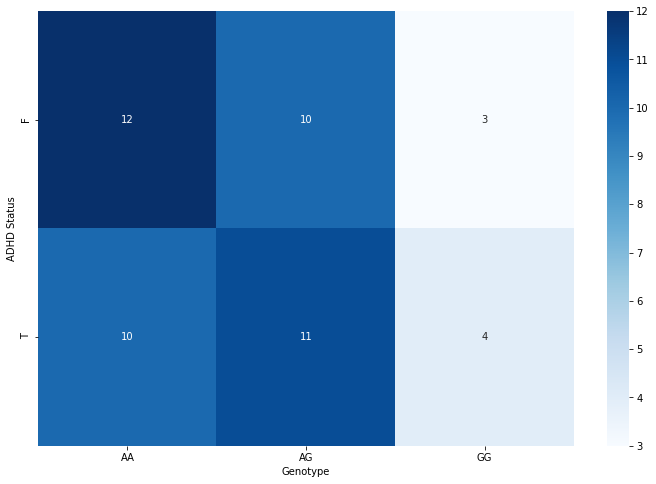

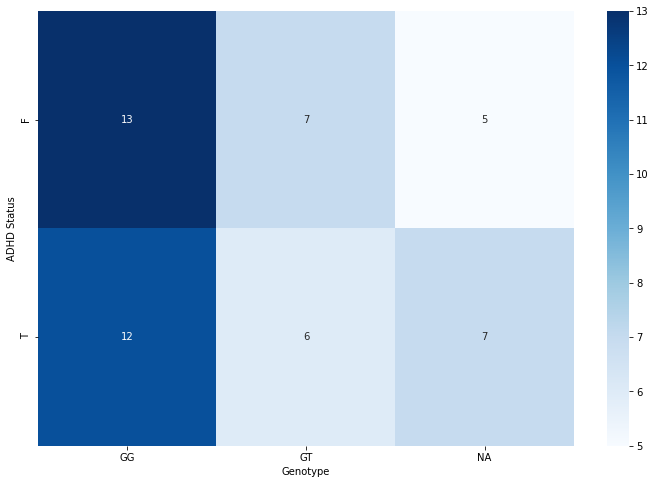

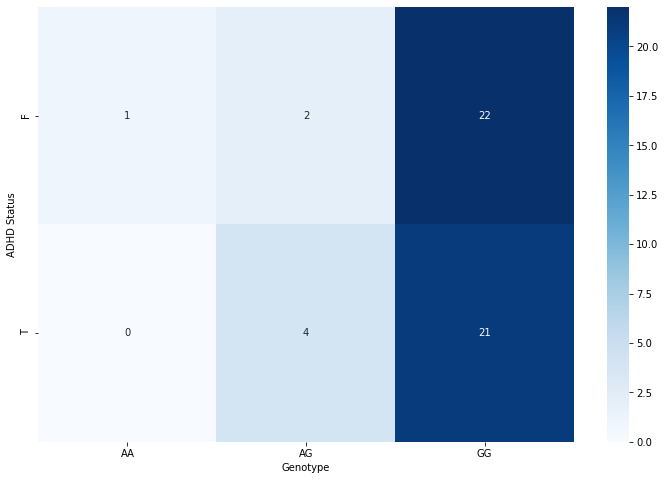

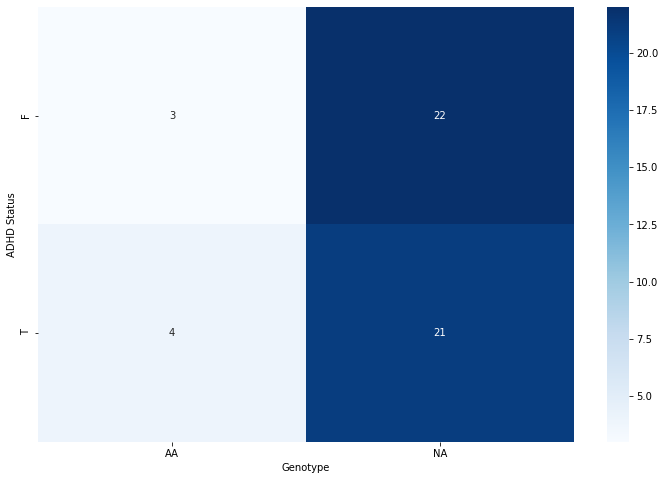

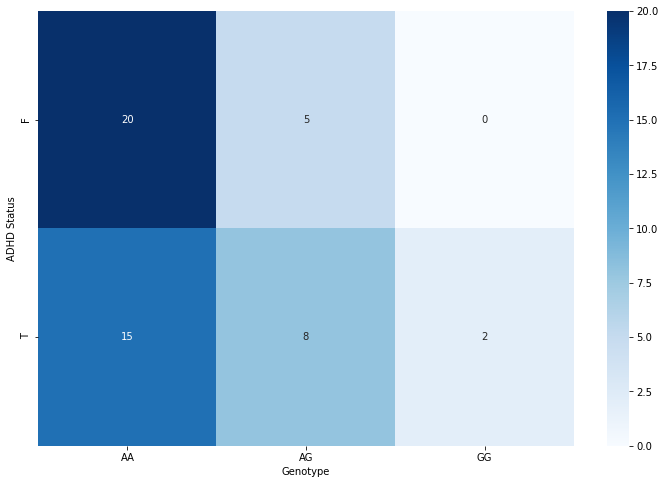

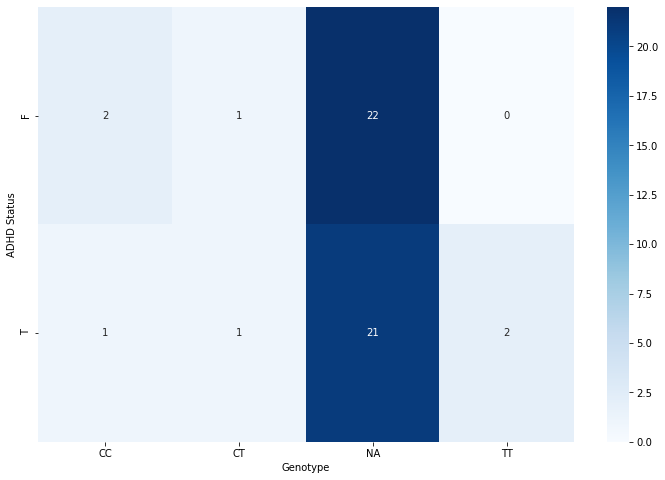

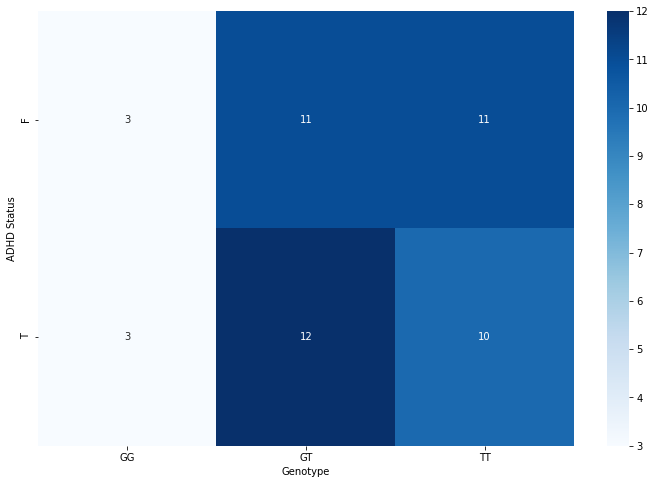

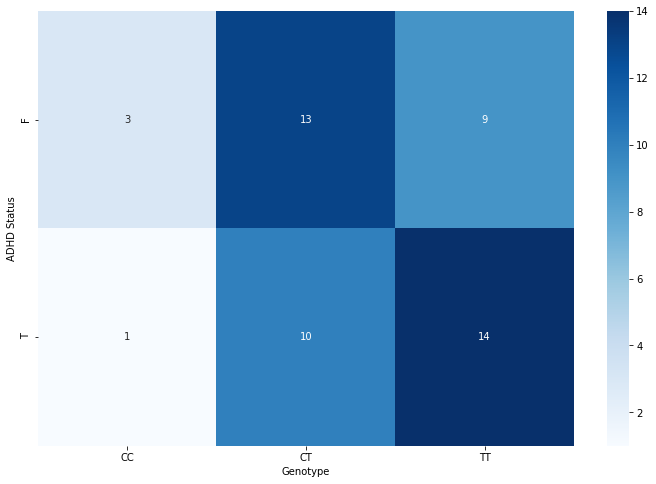

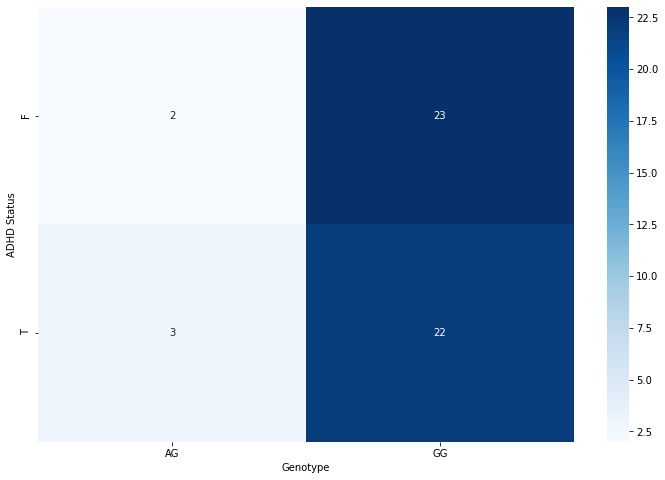

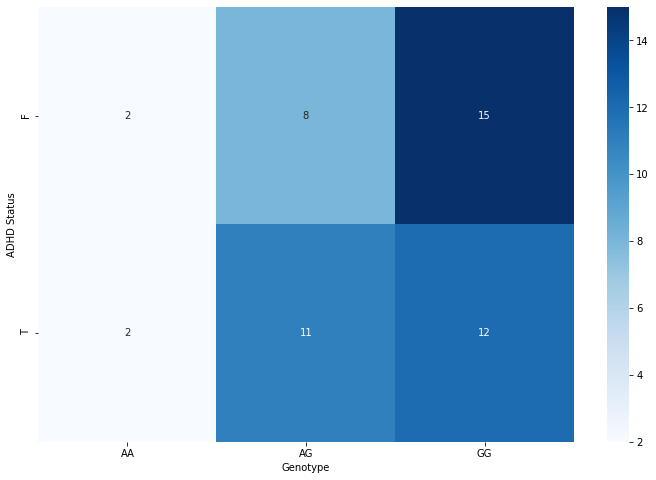

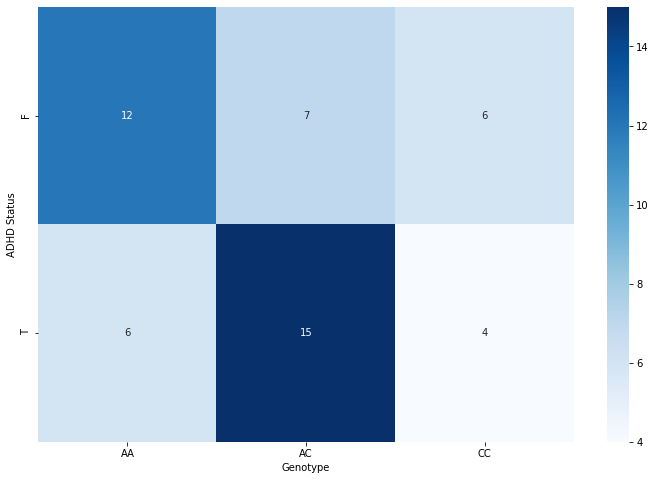

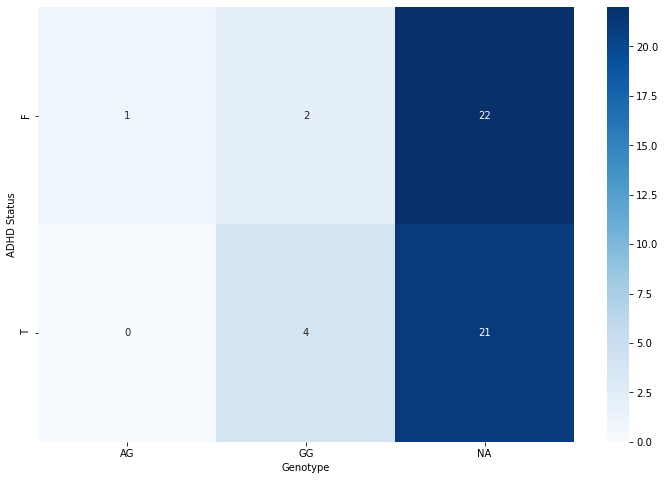

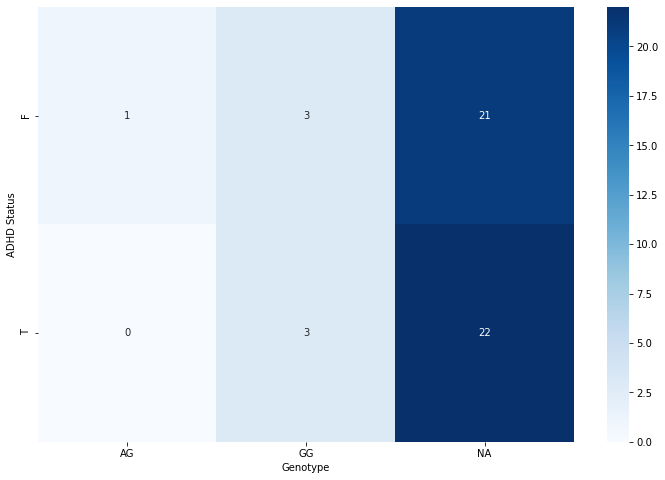

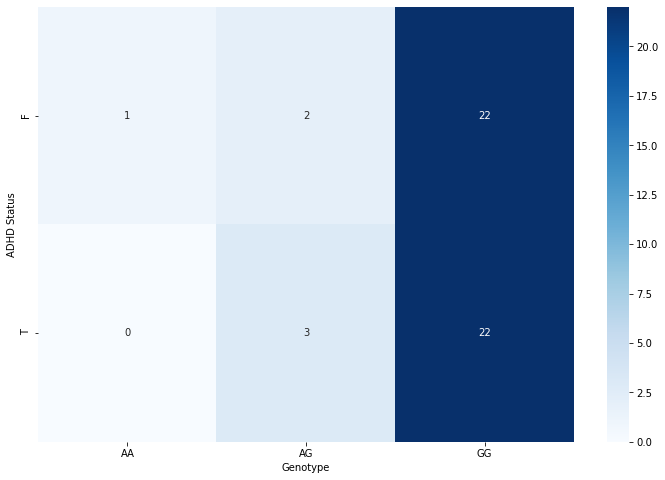

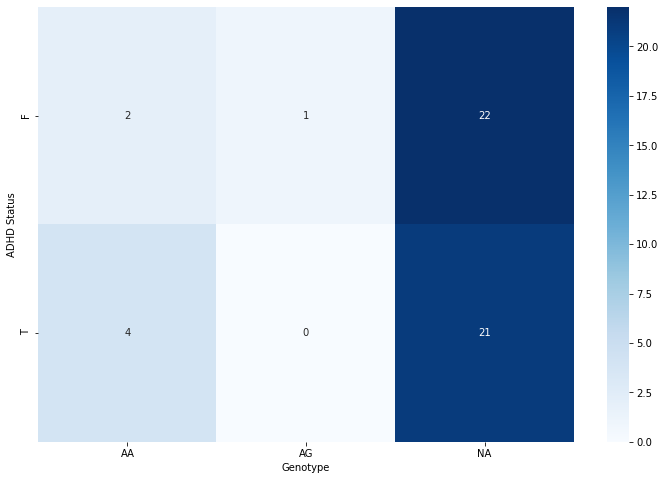

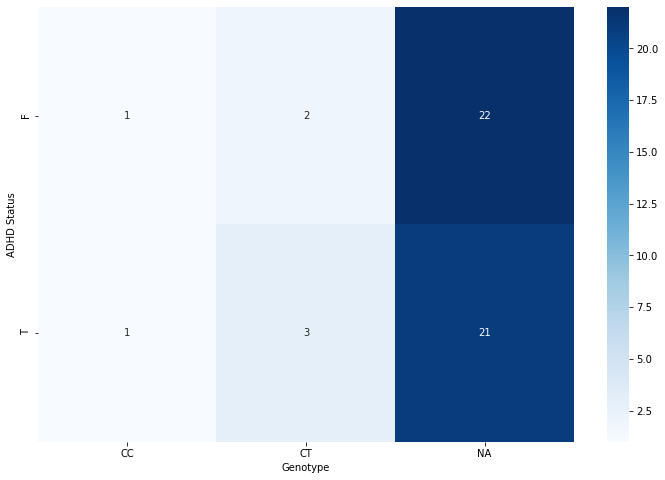

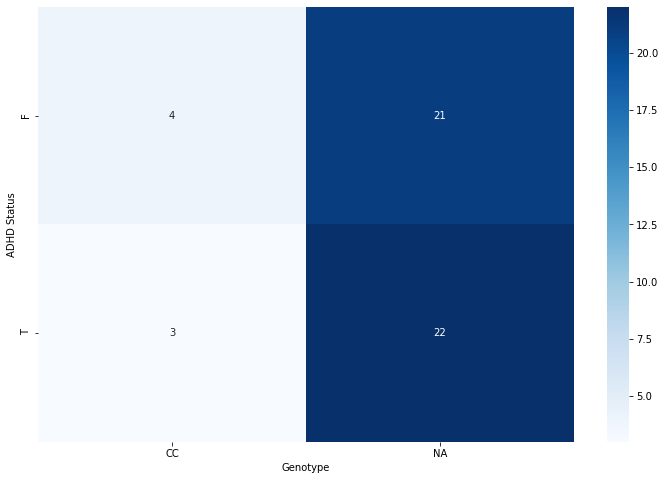

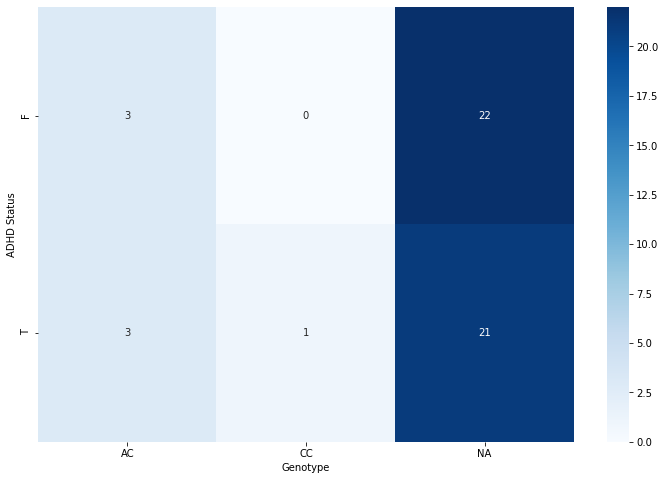

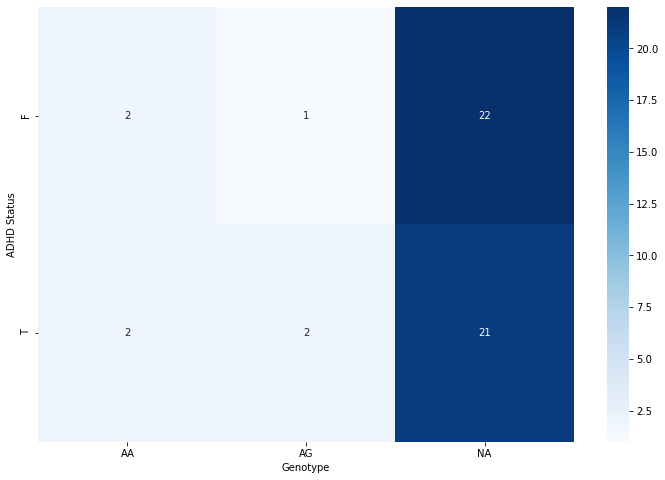

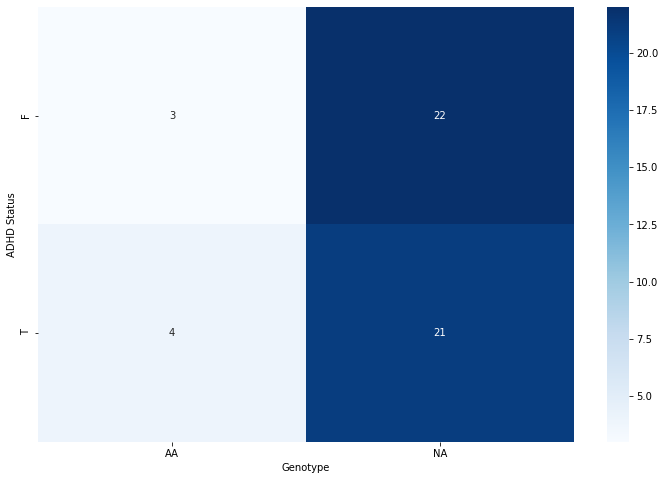

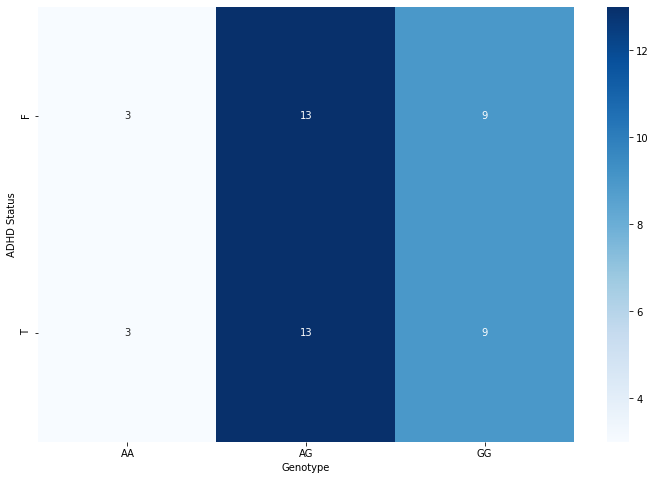

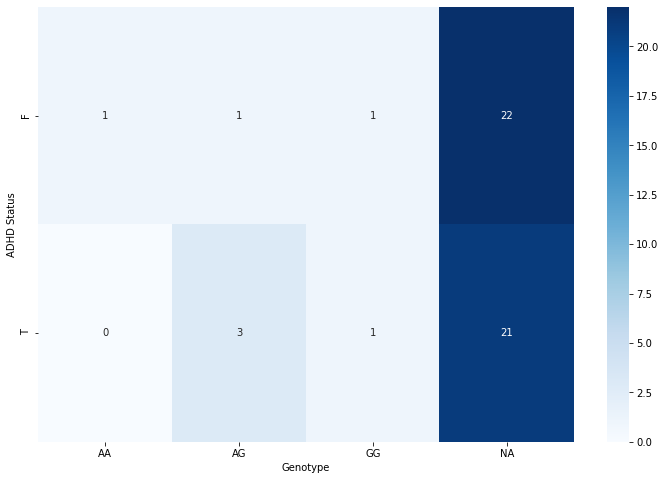

In [26]:
heatmaps = {}
counter = 0

for contingency in contingencies:
    strcounter = str(counter)
    plt.figure(figsize=(12,8))
    heatmaps['Heatmap'+strcounter] = sns.heatmap(contingencies[contingency], annot=True,cmap="Blues")
    counter += 1
    
heatmaps

## Summarizing Graphs

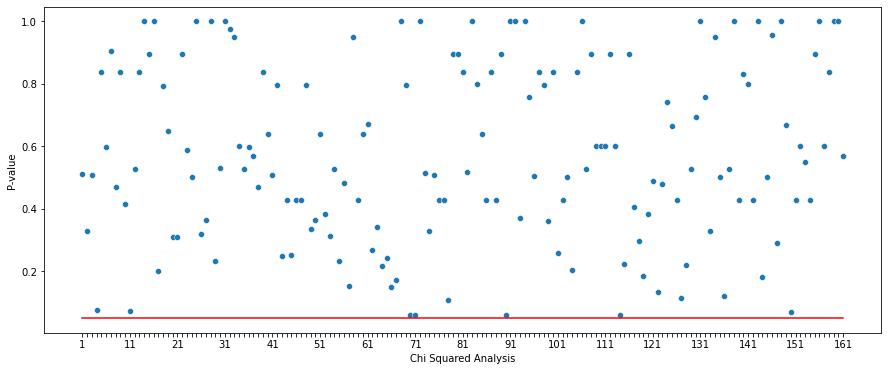

In [77]:
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)
p_value_plot = sns.scatterplot(x="Chi Squared Analysis", y="P-value",data=chi2_analyses_table,ax=ax)
for ind, label in enumerate(p_value_plot.get_xticklabels()):
    if ind % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

x = np.array(range(161))
y = x * 0 + 0.05
plt.plot(x,y,color='red')

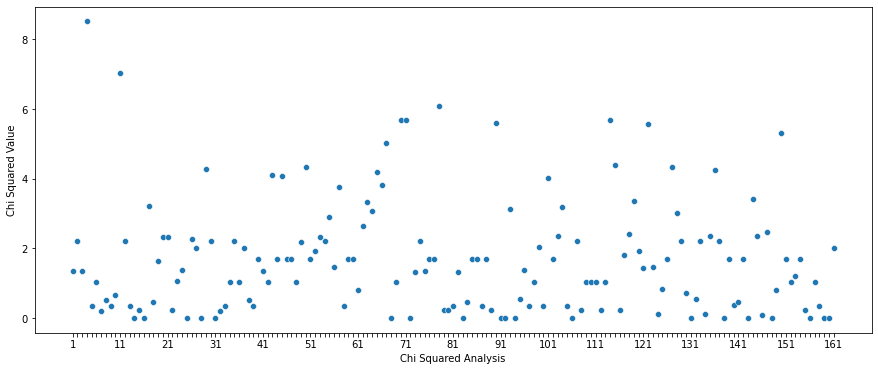

In [78]:
fig, ax = plt.subplots(figsize=dims)
p_value_plot = sns.scatterplot(x="Chi Squared Analysis", y="Chi Squared Value",data=chi2_analyses_table,ax=ax)
for ind, label in enumerate(p_value_plot.get_xticklabels()):
    if ind % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [85]:
chi2_analyses_table.to_csv('chi2_analyses_table.csv', index=False)